# Análisis recaudación y eficiencia recaudatoria
## Junio-2019
Análisis de recaudación tributaria hasta Junio 2019.
- Se analiza comportamiento de Impuesto al Valor Agregado (IVA) y del Impuesto Sobre la Renta  ISR, en valores brutos y netos. También se observa el comportamiento de devoluciones y compensaciones, buscando estudiar el impacto que tuvo la suspensión de compensaciones en 2019.
- Se estudia la eficiencia recaudatoria, definida como la recaudación bruta en términos del Producto Interno bruto (PIB).
    - Un aspecto a tomar en cuenta es la diferencia en termporalidad que hay entre el PIB, que se calcula trimestralmente, y la recaudación, que es mensual. Para lograr un análisis mensual usando los datos más recientes de recaudación (Mayo 2019), utilizamos el Indicador Global de la Atividad Económica para proyectar el PIB del segundo trimestre del 2019. 
    - Estudiamos el comportamiento de la eficiencia recaudatoria en el tiempo. Dada la alta estacionalidad, comparamos la de cada mes en los últimos 5 años.
    - Analizamos la eslasticidad de recaudación con respecto al PIB.
    - Repetimos el análisis de eficiencia a nivel trimestral.

### Instrucciones:
- Jupyter notebook tiene dos estados: Edit y command. 
   - El modo editar se usa para modificar el contenido de una celda, y se puede ver cuando el color a la izquierda de la celda es verde. Para acceder al modo editar, hay que pulsar enter en la celda deseada. 
   - El modo command sirve para correr el código, para copiar y pegar celdas enteras, para cambiar el modo de una celda, etc. Si esta en modo editar, hay que pulsar esc para llegar al modo command.
- Las celdas pueden ser código o markdown (texto), (ver cell -> cell type). Esta celda es markdown. Para cambiar el modo de una celda a markdown, se puede pulsar M en modo command.
- Principales comandos:
    - shift + enter: Correr celda
    - A: Insertar celda arriba (en modo command)
    - B: Insertar celda abajo (en modo command)
    - ESC: Salir de modo edit
    - Enter: Entrar a modo edit
- Cada que vean download.<>() o describe.<>(), se está llamando una función que fue definida en download.py o en describe.py. Para ver instrucciones de la función, pueden ver el script o escribir help() con el nombre de la función  (ejemplo: help(download.get_files))
- Las funciones tienen argumentos. Los argumentos pueden ser introducidos en orden, o en desorden llamando el nombre del argumentp. Por ejemplo, una función que sume dos valores y los divida entre un tercero: sum_x_y_div(1, 2, 3) es igual a sum_x_y(x=1, y=2, z=3)
- En Python todos los límites inferiores se incluyen y los superiores se excluyen.
- Python ofrece integers(1, 2, ...,) floats(1.3..., 2.0, ), Booleans: (True, False) listas: [1, 2, 3], diccionarios: {'a': 1, 'b':2, 'c':3}, sets: {1, 2, 3, ...}, tuples: (1, 2, 3) (Aquí no usamos sets).
    - Listas:
        - Para obtener numero de elementos en lista: len(list)
        - Para obtener el primer elemento de una lista: list[0]
        - '' '' '' '' '' último '' '' '' '' '' '' '' ': list[-1] o list[len(list) -1]
        - '''''''''''''''Del primero al tercero '''''': list[0:3] (El primero se incluye, el último de excluye)
    - Diccionarios:
        - Los diccionarios son un mapa de 'key' a 'value': dict1 = {'a' : 1, 'b': 2, 'c': 3, 'd': [1, 2, 3]}
        - Para obtener el valor asociado a la letra 'a': dict1['a']
        - Para modificar el valor asociado a la letra 'b' : dict1['b'] = 8
        - Para aggregar la letra 'z' con el valor 5: dict1['z'] = 5
    - Tuples:
        - Son como listas, pero no se pueden modificar.
        - Para obtener los elementos, se usa el mismo sintax que con listas.
- Además, las librerias Numpy y Pandas sirven para trabajar con listas de números y con matrices de forma eficiente. Numpy ofrece los numpy arrays, que son vectors con los que se pueden hacer operaciones de vectores. Pandas ofrece DataFrames, que son matrices formadas por vectores llamados pandas Series. Esta es la principal estrictura para trabajar con datos.
    - Los DataFrames tienen columnas e indices. Las columnas son los nombres de las variables, el índice es un identificador de cada fila. Los indices pueden ser numéricos, strings, o para Time Series, elementos de fecha (DateTime)
        - Para obtener la columna 'a' de un DataFrame: DF['a']
        - Para obtener la fila asociada con el índice 2: DF.loc[2]
        - Para obtener el elemento de la fila 2, columna 'a': DF.loc[2, 'a']
        - Para obtener el cuarto elemento (sin importar el valor de su índice): DF.iloc[3]
- Cada que haya dudas, revisar el tipo del objeto usando type(object)

#### Comandos para poder modificar scripts de Python y ver los cambios inmediatamente en notebook:

In [1]:
# Configuraciones de Jupyter que sirven para que cambios en los scripts se actualicen automáticamente
%load_ext autoreload
%autoreload 2

#### Importar paquetes y scripts de Python:

In [2]:
#Paquetes de Python:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
# import warnings


# Scripts propios:
import download
import descriptive

#Opciones de visualización
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

#### Parámetros de las estimaciones

In [3]:
params = {
}

## Descarga de datos:

Ejemplo de una función. Es la función get_files en el script download.py. Esta función toma 7 argumentos, uno para cada descarga. La función descargará todas las bases que se pongan como True (Por default, y como está escritp ahora, la función no hace nada). Los datos se descargan en una carpeta 'inputs' en la carpeta madre de este archivo. Si no existe la carpeta inputs, la función crea la carpeta.

In [4]:
download.get_files(inpc_2018=False, pibr_2013=False, igae=False, fiscal_current=False, fiscal_hist=False)

## Importando datos

Cada una de las siguientes funciones sirve para cargar los datos descargados como Pandas DataFrame. Las funciones fueron escritas para que Python sepa donde están los datos descargados, por eso no hay que indicar la ruta de los csv. Si se especifica sa=True, en las funciones de IGAE y de PIB_r, se cargan los datos ajustados por estacionalidad. El principal requisito para correr estas funciones es haber descargado los datos. 

Otra opción sería importar cada uno de los CSV usando df = pd.read_csv(csv_path). De hecho, cada una de estas funciones hace eso, pero también hacen unas modificaciones que nos ayudan mucho, por ejemplo:
- Convierten los datos a datos mensuales con índice DateTime
- Crean variables en valores reales, usando en INPC
- Crean variables conjuntas (Como la suma de devoluciones y compensacines para ingresos sat).
- Etc

In [5]:
ingresos_brutos = download.load_ingresos_fiscales_brutos()
ingresos_netos = download.load_ingresos_fiscales_netos()
igae = download.load_inegi_indic('igae')
pib_r_df = download.load_pib_r()
calendario_lif = pd.read_excel('../inputs/calendario_lif.xlsx', index_col='fecha')
calendario_lif.index = pd.to_datetime(calendario_lif.index)

In [6]:
ingresos_netos.loc['2018-12-01']

ingresos_sector_publico_neto_(mdp)             458980.400200
iva_neto_(mdp)                                  66065.737670
ieps_neto_(mdp)                                 34453.127750
ingresos_no_tributarios_neto_(mdp)              57862.712570
ieps_gasolina_(mdp)                             21982.698350
ingresos_gobierno_federal_neto_(mdp)           329399.284000
ingresos_tributarios_neto_(mdp)                271536.571500
isr_neto_(mdp)                                 160766.758400
ingresos_tributarios_neto_sin_gasol_(mdp)      249553.873150
ieps_neto_sin_gasol_(mdp)                       12470.429400
inpc                                               99.740853
ingresos_sector_publico_neto_(mdp)_r           460172.923533
iva_neto_(mdp)_r                                66237.389735
ieps_neto_(mdp)_r                               34542.643901
ingresos_no_tributarios_neto_(mdp)_r            58013.051527
ieps_gasolina_(mdp)_r                           22039.813819
ingresos_gobierno_federa

Podemos ver el tipo de cada uno de estos objetos. ** Si no incluimos display, solo se veria el último resultado.

In [7]:
# display(type(ingresos_brutos))
# display(type(ingresos_netos))
# display(type(igae))
# display(type(pib_r_df))
# display(type(calendario_lif))

Podemos ver las dimensiones de cada uno de los DF.

In [8]:
# display(ingresos_brutos.shape)
# display(ingresos_netos.shape)
# display(igae.shape)
# display(pib_r_df.shape)
# display(calendario_lif.shape)

Podemos ver estadísticas descriptivas de las variables de cada DF

In [9]:
# display(ingresos_brutos.describe())
# display(ingresos_netos.describe())
# display(igae.describe())
# display(pib_r_df.describe())
# display(calendario_lif.describe())

Podemos ver el índice de cada DF. Únicamente los ingresos los tenemos desde 2014, los demás desde 1990 aprox.

In [10]:
# display(ingresos_brutos.index)
# display(ingresos_netos.index)
# display(igae.index)
# display(pib_r_df.index)
# display(calendario_lif.index)

# Comparación con LIF

In [11]:
# Creamos una columna nueva para los ingresos no tributarios
calendario_lif['ingresos_no_tributatios'] = \
    calendario_lif[['derechos', 'aprovechamientos', 'transferencias_fmp', 'otros']].sum(axis=1)
# Añadimos sufijo de presupeustados
calendario_lif = calendario_lif.add_suffix('_presupuestado')

In [12]:
# creamos lista de variables que vamos a comparar
observados_a_comparar = ['ingresos_sector_publico_neto_(mdp)',\
                         'ingresos_gobierno_federal_neto_(mdp)',\
                         'ingresos_no_tributarios_neto_(mdp)',\
                         'ingresos_tributarios_neto_(mdp)',\
                         'isr_neto_(mdp)',\
                         'iva_neto_(mdp)',\
                         'ieps_neto_(mdp)']
presupuestados_a_comparar = ['ingresos_del_sector_public_presupuestado',\
                             'ingresos_gobierno_federal_presupuestado',\
                             'ingresos_no_tributatios_presupuestado',\
                             'ingresos_tributarios_presupuestado','isr_presupuestado',\
                             'iva_presupuestado', 'ieps_presupuestado']

In [13]:
# Hacemos un DF conjunto para que sea mas facil graficar y obtener estadísticas comparativas
df_comparacion = pd.merge(
    calendario_lif[presupuestados_a_comparar],
    ingresos_netos[observados_a_comparar],
    left_index=True, right_index=True,
    how='left')

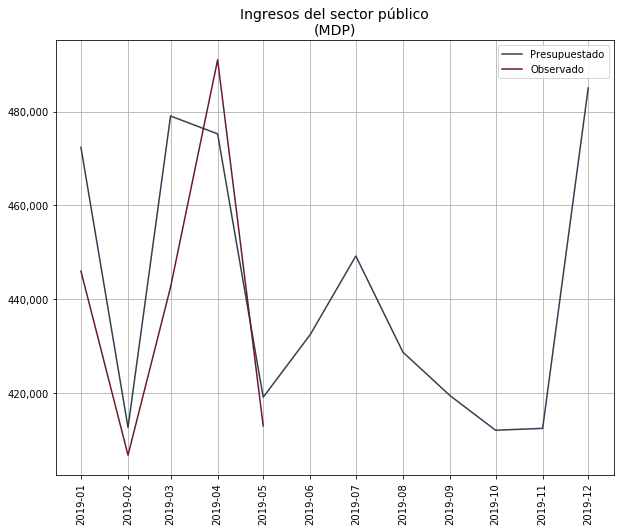

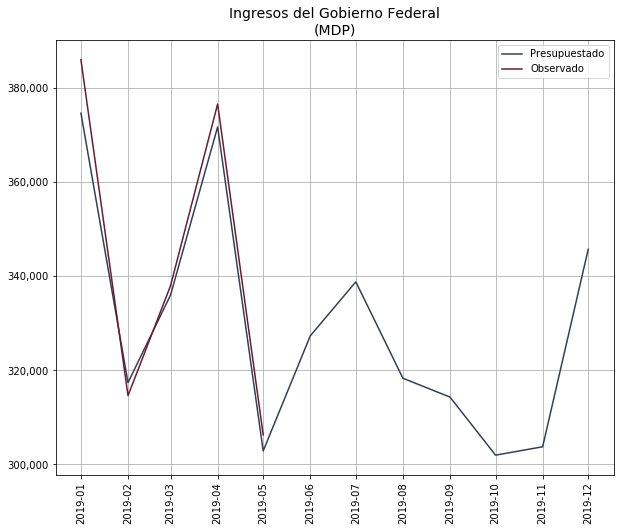

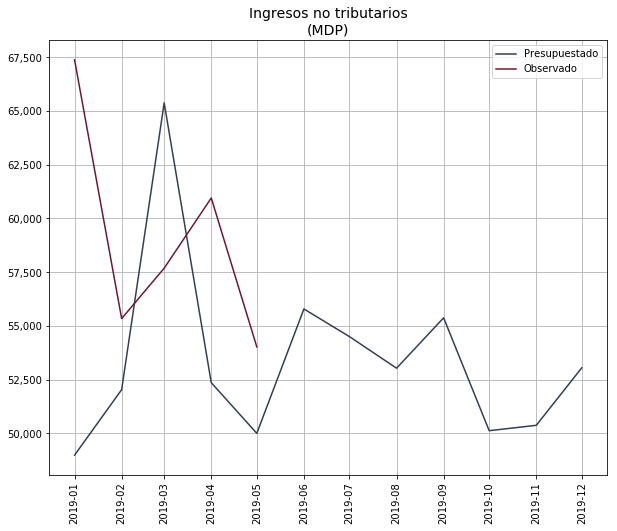

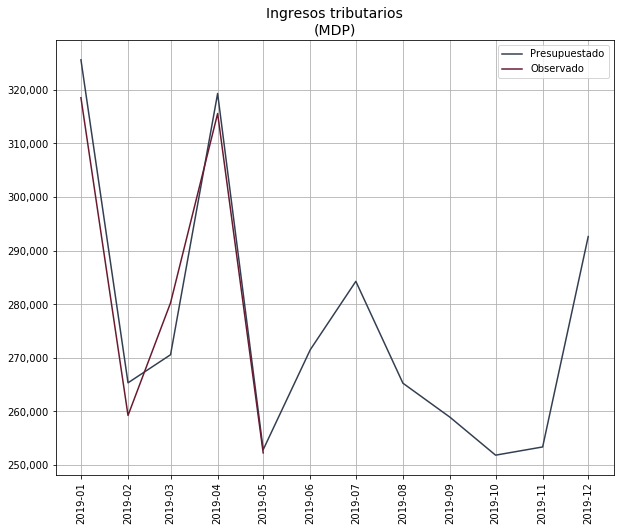

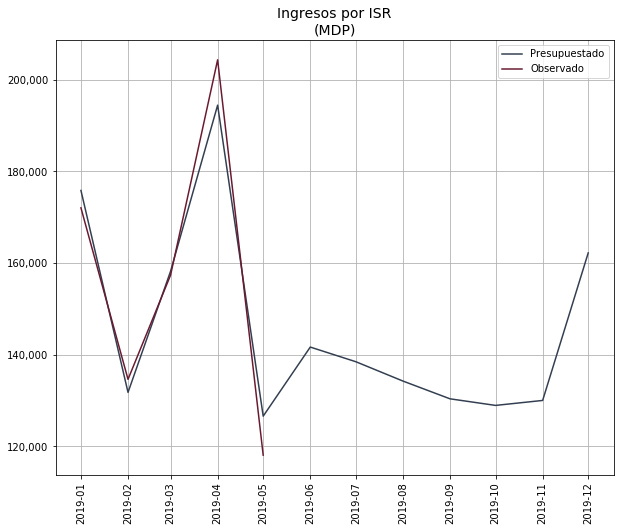

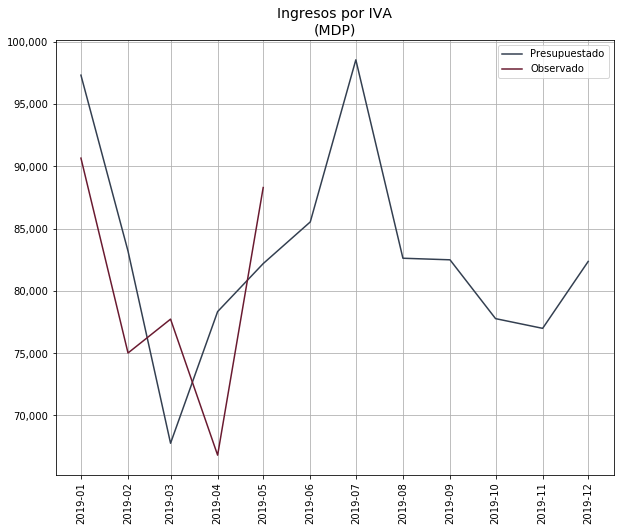

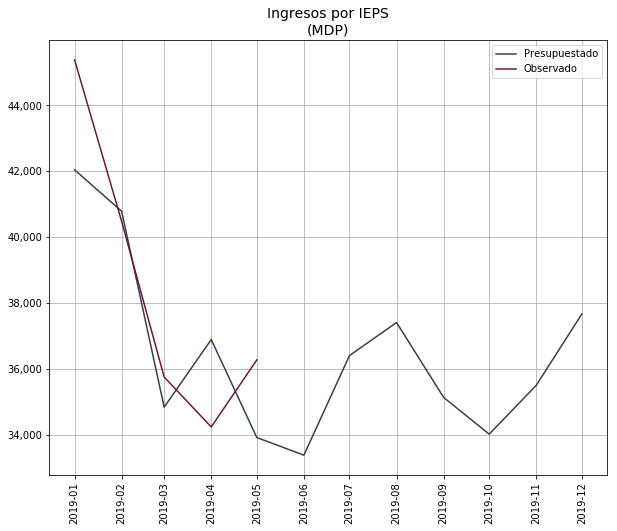

In [14]:
# Vamos a graficar varias sub graficas. Para ello vamos a usar las listas de columnas.
# Creamos una lista de los titulos que usaremos
titulos = ['Ingresos del sector público',
           'Ingresos del Gobierno Federal',
           'Ingresos no tributarios',
           'Ingresos tributarios',
           'Ingresos por ISR',
           'Ingresos por IVA',\
           'Ingresos por IEPS']
number_of_graphs = len(titulos)
for i in range(number_of_graphs):
    cols_to_plot = [presupuestados_a_comparar[i], observados_a_comparar[i]]
    titulo = titulos[i]
    descriptive.plot_series(df=df_comparacion, cols=cols_to_plot, title=titulo,
                            subtitle='(MDP)', legend=['Presupuestado', 'Observado'],
                            ticks='monthly', figsize=(10, 8))

In [15]:
for i in range(number_of_graphs):
    cols_to_plot = [presupuestados_a_comparar[i], observados_a_comparar[i]]
    comparison = df_comparacion[cols_to_plot].copy()
    titulos_tablas = [titulos[i] + term for term in [' presupuestados', ' observados']]
    comparison.columns = titulos_tablas
    comparison['diferencia'] = comparison[titulos_tablas[1]] - comparison[titulos_tablas[0]]
    comparison['diferencia porcentual'] = (comparison['diferencia'] / comparison[titulos_tablas[0]]) * 100
    comparison = comparison.applymap(lambda x: '{:,.2f}'.format(x))
    display(comparison)

Ingresos del sector público presupuestados  \
fecha                                                   
2019-01-01                                 472,378.10   
2019-02-01                                 412,706.50   
2019-03-01                                 479,048.40   
2019-04-01                                 475,241.40   
2019-05-01                                 419,153.10   
2019-06-01                                 432,510.60   
2019-07-01                                 449,227.00   
2019-08-01                                 428,753.20   
2019-09-01                                 419,501.50   
2019-10-01                                 412,127.30   
2019-11-01                                 412,526.80   
2019-12-01                                 485,014.40   

           Ingresos del sector público observados  diferencia  \
fecha                                                           
2019-01-01                             446,015.42  -26,362.68   
2019-02-01                             406,820.12   -5,886.38   
2019-03-01                             442,595.43  -36,452.97   
2019-04-01                             491,015.33   15,773.93   
2019-05-01                             413,058.09   -6,095.01   
2019-06-01                                    nan         nan   
2019-07-01                                    nan         nan   
2019-08-01                                    nan         nan   
2019-09-01                                    nan         nan   
2019-10-01                                    nan         nan   
2019-11-01                                    nan         nan   
2019-12-01                                    nan         nan   

           diferencia porcentual  
fecha                             
2019-01-01                 -5.58  
2019-02-01                 -1.43  
2019-03-01                 -7.61  
2019-04-01                  3.32  
2019-05-01                 -1.45  
2019-06-01                   nan  
2019-07-01                   nan  
2019-08-01                   nan  
2019-09-01                   nan  
2019-10-01                   nan  
2019-11-01                   nan  
2019-12-01                   nan

Ingresos del Gobierno Federal presupuestados  \
fecha                                                     
2019-01-01                                   374,544.80   
2019-02-01                                   317,366.40   
2019-03-01                                   335,951.00   
2019-04-01                                   371,638.60   
2019-05-01                                   302,860.40   
2019-06-01                                   327,293.70   
2019-07-01                                   338,755.60   
2019-08-01                                   318,293.00   
2019-09-01                                   314,290.00   
2019-10-01                                   301,965.40   
2019-11-01                                   303,745.40   
2019-12-01                                   345,653.10   

           Ingresos del Gobierno Federal observados diferencia  \
fecha                                                            
2019-01-01                               385,883.52  11,338.72   
2019-02-01                               314,594.42  -2,771.98   
2019-03-01                               337,930.90   1,979.90   
2019-04-01                               376,500.52   4,861.92   
2019-05-01                               306,286.68   3,426.28   
2019-06-01                                      nan        nan   
2019-07-01                                      nan        nan   
2019-08-01                                      nan        nan   
2019-09-01                                      nan        nan   
2019-10-01                                      nan        nan   
2019-11-01                                      nan        nan   
2019-12-01                                      nan        nan   

           diferencia porcentual  
fecha                             
2019-01-01                  3.03  
2019-02-01                 -0.87  
2019-03-01                  0.59  
2019-04-01                  1.31  
2019-05-01                  1.13  
2019-06-01                   nan  
2019-07-01                   nan  
2019-08-01                   nan  
2019-09-01                   nan  
2019-10-01                   nan  
2019-11-01                   nan  
2019-12-01                   nan

Ingresos no tributarios presupuestados  \
fecha                                               
2019-01-01                              48,981.60   
2019-02-01                              52,031.40   
2019-03-01                              65,382.00   
2019-04-01                              52,355.80   
2019-05-01                              49,997.10   
2019-06-01                              55,787.90   
2019-07-01                              54,500.20   
2019-08-01                              53,030.10   
2019-09-01                              55,375.30   
2019-10-01                              50,120.90   
2019-11-01                              50,370.40   
2019-12-01                              53,051.30   

           Ingresos no tributarios observados diferencia diferencia porcentual  
fecha                                                                           
2019-01-01                          67,386.16  18,404.56                 37.57  
2019-02-01                          55,340.28   3,308.88                  6.36  
2019-03-01                          57,686.04  -7,695.96                -11.77  
2019-04-01                          60,953.47   8,597.67                 16.42  
2019-05-01                          54,019.44   4,022.34                  8.05  
2019-06-01                                nan        nan                   nan  
2019-07-01                                nan        nan                   nan  
2019-08-01                                nan        nan                   nan  
2019-09-01                                nan        nan                   nan  
2019-10-01                                nan        nan                   nan  
2019-11-01                                nan        nan                   nan  
2019-12-01                                nan        nan                   nan

Ingresos tributarios presupuestados  \
fecha                                            
2019-01-01                          325,563.20   
2019-02-01                          265,335.00   
2019-03-01                          270,569.00   
2019-04-01                          319,282.80   
2019-05-01                          252,863.30   
2019-06-01                          271,505.80   
2019-07-01                          284,255.40   
2019-08-01                          265,262.90   
2019-09-01                          258,914.70   
2019-10-01                          251,844.50   
2019-11-01                          253,375.00   
2019-12-01                          292,601.80   

           Ingresos tributarios observados diferencia diferencia porcentual  
fecha                                                                        
2019-01-01                      318,497.36  -7,065.84                 -2.17  
2019-02-01                      259,254.14  -6,080.86                 -2.29  
2019-03-01                      280,244.87   9,675.87                  3.58  
2019-04-01                      315,547.05  -3,735.75                 -1.17  
2019-05-01                      252,267.24    -596.06                 -0.24  
2019-06-01                             nan        nan                   nan  
2019-07-01                             nan        nan                   nan  
2019-08-01                             nan        nan                   nan  
2019-09-01                             nan        nan                   nan  
2019-10-01                             nan        nan                   nan  
2019-11-01                             nan        nan                   nan  
2019-12-01                             nan        nan                   nan

Ingresos por ISR presupuestados Ingresos por ISR observados  \
fecha                                                                    
2019-01-01                      175,807.60                  172,013.06   
2019-02-01                      131,759.30                  134,606.48   
2019-03-01                      158,167.40                  157,327.26   
2019-04-01                      194,415.80                  204,305.31   
2019-05-01                      126,573.00                  118,065.45   
2019-06-01                      141,642.00                         nan   
2019-07-01                      138,447.80                         nan   
2019-08-01                      134,231.10                         nan   
2019-09-01                      130,355.50                         nan   
2019-10-01                      128,918.00                         nan   
2019-11-01                      130,000.70                         nan   
2019-12-01                      162,182.00                         nan   

           diferencia diferencia porcentual  
fecha                                        
2019-01-01  -3,794.54                 -2.16  
2019-02-01   2,847.18                  2.16  
2019-03-01    -840.14                 -0.53  
2019-04-01   9,889.51                  5.09  
2019-05-01  -8,507.55                 -6.72  
2019-06-01        nan                   nan  
2019-07-01        nan                   nan  
2019-08-01        nan                   nan  
2019-09-01        nan                   nan  
2019-10-01        nan                   nan  
2019-11-01        nan                   nan  
2019-12-01        nan                   nan

Ingresos por IVA presupuestados Ingresos por IVA observados  \
fecha                                                                    
2019-01-01                       97,326.90                   90,664.78   
2019-02-01                       83,195.70                   75,017.94   
2019-03-01                       67,770.50                   77,735.69   
2019-04-01                       78,342.10                   66,814.34   
2019-05-01                       82,195.40                   88,302.42   
2019-06-01                       85,542.50                         nan   
2019-07-01                       98,559.40                         nan   
2019-08-01                       82,626.70                         nan   
2019-09-01                       82,500.00                         nan   
2019-10-01                       77,776.20                         nan   
2019-11-01                       76,996.70                         nan   
2019-12-01                       82,371.20                         nan   

            diferencia diferencia porcentual  
fecha                                         
2019-01-01   -6,662.12                 -6.85  
2019-02-01   -8,177.76                 -9.83  
2019-03-01    9,965.19                 14.70  
2019-04-01  -11,527.76                -14.71  
2019-05-01    6,107.02                  7.43  
2019-06-01         nan                   nan  
2019-07-01         nan                   nan  
2019-08-01         nan                   nan  
2019-09-01         nan                   nan  
2019-10-01         nan                   nan  
2019-11-01         nan                   nan  
2019-12-01         nan                   nan

Ingresos por IEPS presupuestados Ingresos por IEPS observados  \
fecha                                                                      
2019-01-01                        42,039.00                    45,378.36   
2019-02-01                        40,779.30                    40,471.83   
2019-03-01                        34,830.60                    35,744.37   
2019-04-01                        36,883.60                    34,229.71   
2019-05-01                        33,907.40                    36,266.69   
2019-06-01                        33,372.90                          nan   
2019-07-01                        36,396.70                          nan   
2019-08-01                        37,400.30                          nan   
2019-09-01                        35,126.70                          nan   
2019-10-01                        34,010.00                          nan   
2019-11-01                        35,494.70                          nan   
2019-12-01                        37,659.70                          nan   

           diferencia diferencia porcentual  
fecha                                        
2019-01-01   3,339.36                  7.94  
2019-02-01    -307.47                 -0.75  
2019-03-01     913.77                  2.62  
2019-04-01  -2,653.89                 -7.20  
2019-05-01   2,359.29                  6.96  
2019-06-01        nan                   nan  
2019-07-01        nan                   nan  
2019-08-01        nan                   nan  
2019-09-01        nan                   nan  
2019-10-01        nan                   nan  
2019-11-01        nan                   nan  
2019-12-01        nan                   nan

## Análisis de Ingresos Fiscales

La función plot_series, del script descriptive la uso mucho. Sirve para hacer una gráfica de los datos de un DataFrame. Veamos los argumentos que toma:

In [16]:
help(descriptive.plot_series)

Help on function plot_series in module descriptive:

plot_series(df, cols=None, title=None, subtitle=None, legend=None, save_to=None, min_date=None, max_date=None, ticks='auto', ticks_freq=1, figsize=(15, 8), legend_out=False, dpi=None, footnote=None, hline=None)
    La función plot_series sirve para hacer una gráfica de los datos de un DataFrame.
    Inputs:
        - df: DataFrame or Serie
        - cols: [str] (Nombres de las columnas a graficar) Default: Todo el DF
        - title: str (Título del gráfico). Default: None
        - subtitle: str (Subtítulo del gráfico). Default: None
        - legend: [str] (Legendas a utilizar) Default: Las legendas serán los nombres de las variables). 
        - save_to: 'str' (Filepath para guardar imagen) Defaults: None (No se guarda)
        - min_date: str or datetime. (Fecha a partir de la cual se verá la gráfica). Default: None (Se incluyen todas las fechas)
        - max_date: str or datetime. (Fecha máxima se verá la gráfica). Default: Non

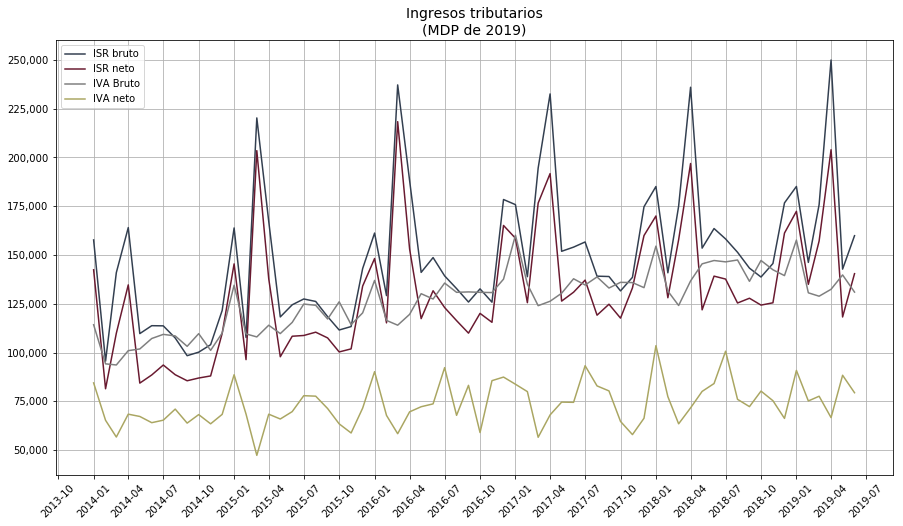

In [17]:
descriptive.plot_series(df = ingresos_brutos,
                        cols = ['isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r', 'iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r'],
                        legend= ['ISR bruto', 'ISR neto', 'IVA Bruto', 'IVA neto'],
                        title='Ingresos tributarios', subtitle='(MDP de 2019)',ticks='quarterly')

cross_tab es otra función muy utilizada. Hace una tabla comparativa por año y por mes de las variables indicadas. Argume tos:
- df: DF
- cols: [str]
- years: [int]
- ratios: Bool, Indica que las variables que es están analizando son ratios. Esto es indispensable para calcular los totales. Defaults: False
- cols_for_tot: [[str]] Si las variables son ratios, la función necesita los numeradores y denominadores para calcular el valor de los totales. Por cada variable que se incluya en columns, se debe incluir el par de variables que se usaron para construir. Default: None
- for_plot: Bool.  Sirve para que el resultado tenga los meses como columnas. En dado caso, la tabla es muy sencilla, solo con el objetivo de hacer una gráfica. Default: False
- notna: Bool: Solo incluir meses para los cuales haya valores para todos los años. Default: True
- absolute_change: Bool, calcular el cambio como porcentual o absoluto. Para variables que son ratios, creo que es mejor calcular el cambio como absoluto. Default False
    '''

In [2]:
ingresos_brutos

NameError: name 'ingresos_brutos' is not defined

In [18]:
descriptive.cross_tab(df = ingresos_brutos,
                      cols = ['isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r', 'iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r'],
                      years = [2018, 2019],
                      ratios=False)

## Análisis de compensaciones y devoluciones

### MDP de 2019

# Vamos a crear columna de compensaciones + devoluciones ISR IVA... hay que añadir esto al archivo de descarga

In [23]:
ingresos_brutos['isr_iva_dev_comp_(mdp)_r'] = ingresos_brutos['iva_dev_comp_(mdp)_r'] +\
    ingresos_brutos['isr_dev_comp_(mdp)_r']
ingresos_brutos['isr_iva_bruto_(mdp)_r'] = ingresos_brutos['isr_bruto_(mdp)_r'] + ingresos_brutos['iva_bruto_(mdp)_r']
ingresos_brutos['iva_isr_dev_comp_%bruto'] = (ingresos_brutos['isr_iva_dev_comp_(mdp)_r'] /\
                                             ingresos_brutos['isr_iva_bruto_(mdp)_r']) * 100

In [28]:
display(descriptive.cross_tab(df = ingresos_brutos,
                      cols = ['iva_bruto_(mdp)_r', 'isr_bruto_(mdp)_r', 'isr_iva_bruto_(mdp)_r'],
                      years = [2018, 2019],
                      ratios = False,
                      absolute_change=True,
                      perc_change=True,
                      cumsum=True))
display(descriptive.cross_tab(df = ingresos_brutos,
                      cols = ['iva_dev_comp_(mdp)_r', 'isr_dev_comp_(mdp)_r', 'isr_iva_dev_comp_(mdp)_r'],
                      years = [2018, 2019],
                      ratios = False,
                      absolute_change=True,
                      perc_change=True,
                      cumsum=True))
# display(descriptive.cross_tab(df = ingresos_brutos,
#                       cols = ['iva_dev_comp_%bruto', 'isr_dev_comp_%bruto', 'iva_isr_dev_comp_%bruto'],
#                       years = [2018, 2019],
#                       ratios = True,
#                       absolute_change=True))

In [30]:
devcomp = descriptive.cross_tab(df = ingresos_brutos,
                      cols = ['iva_dev_comp_(mdp)_r', 'isr_dev_comp_(mdp)_r', 'isr_iva_dev_comp_(mdp)_r'],
                      years = [2018, 2019],
                      ratios = False,
                      cumsum=True,
                      style=False)

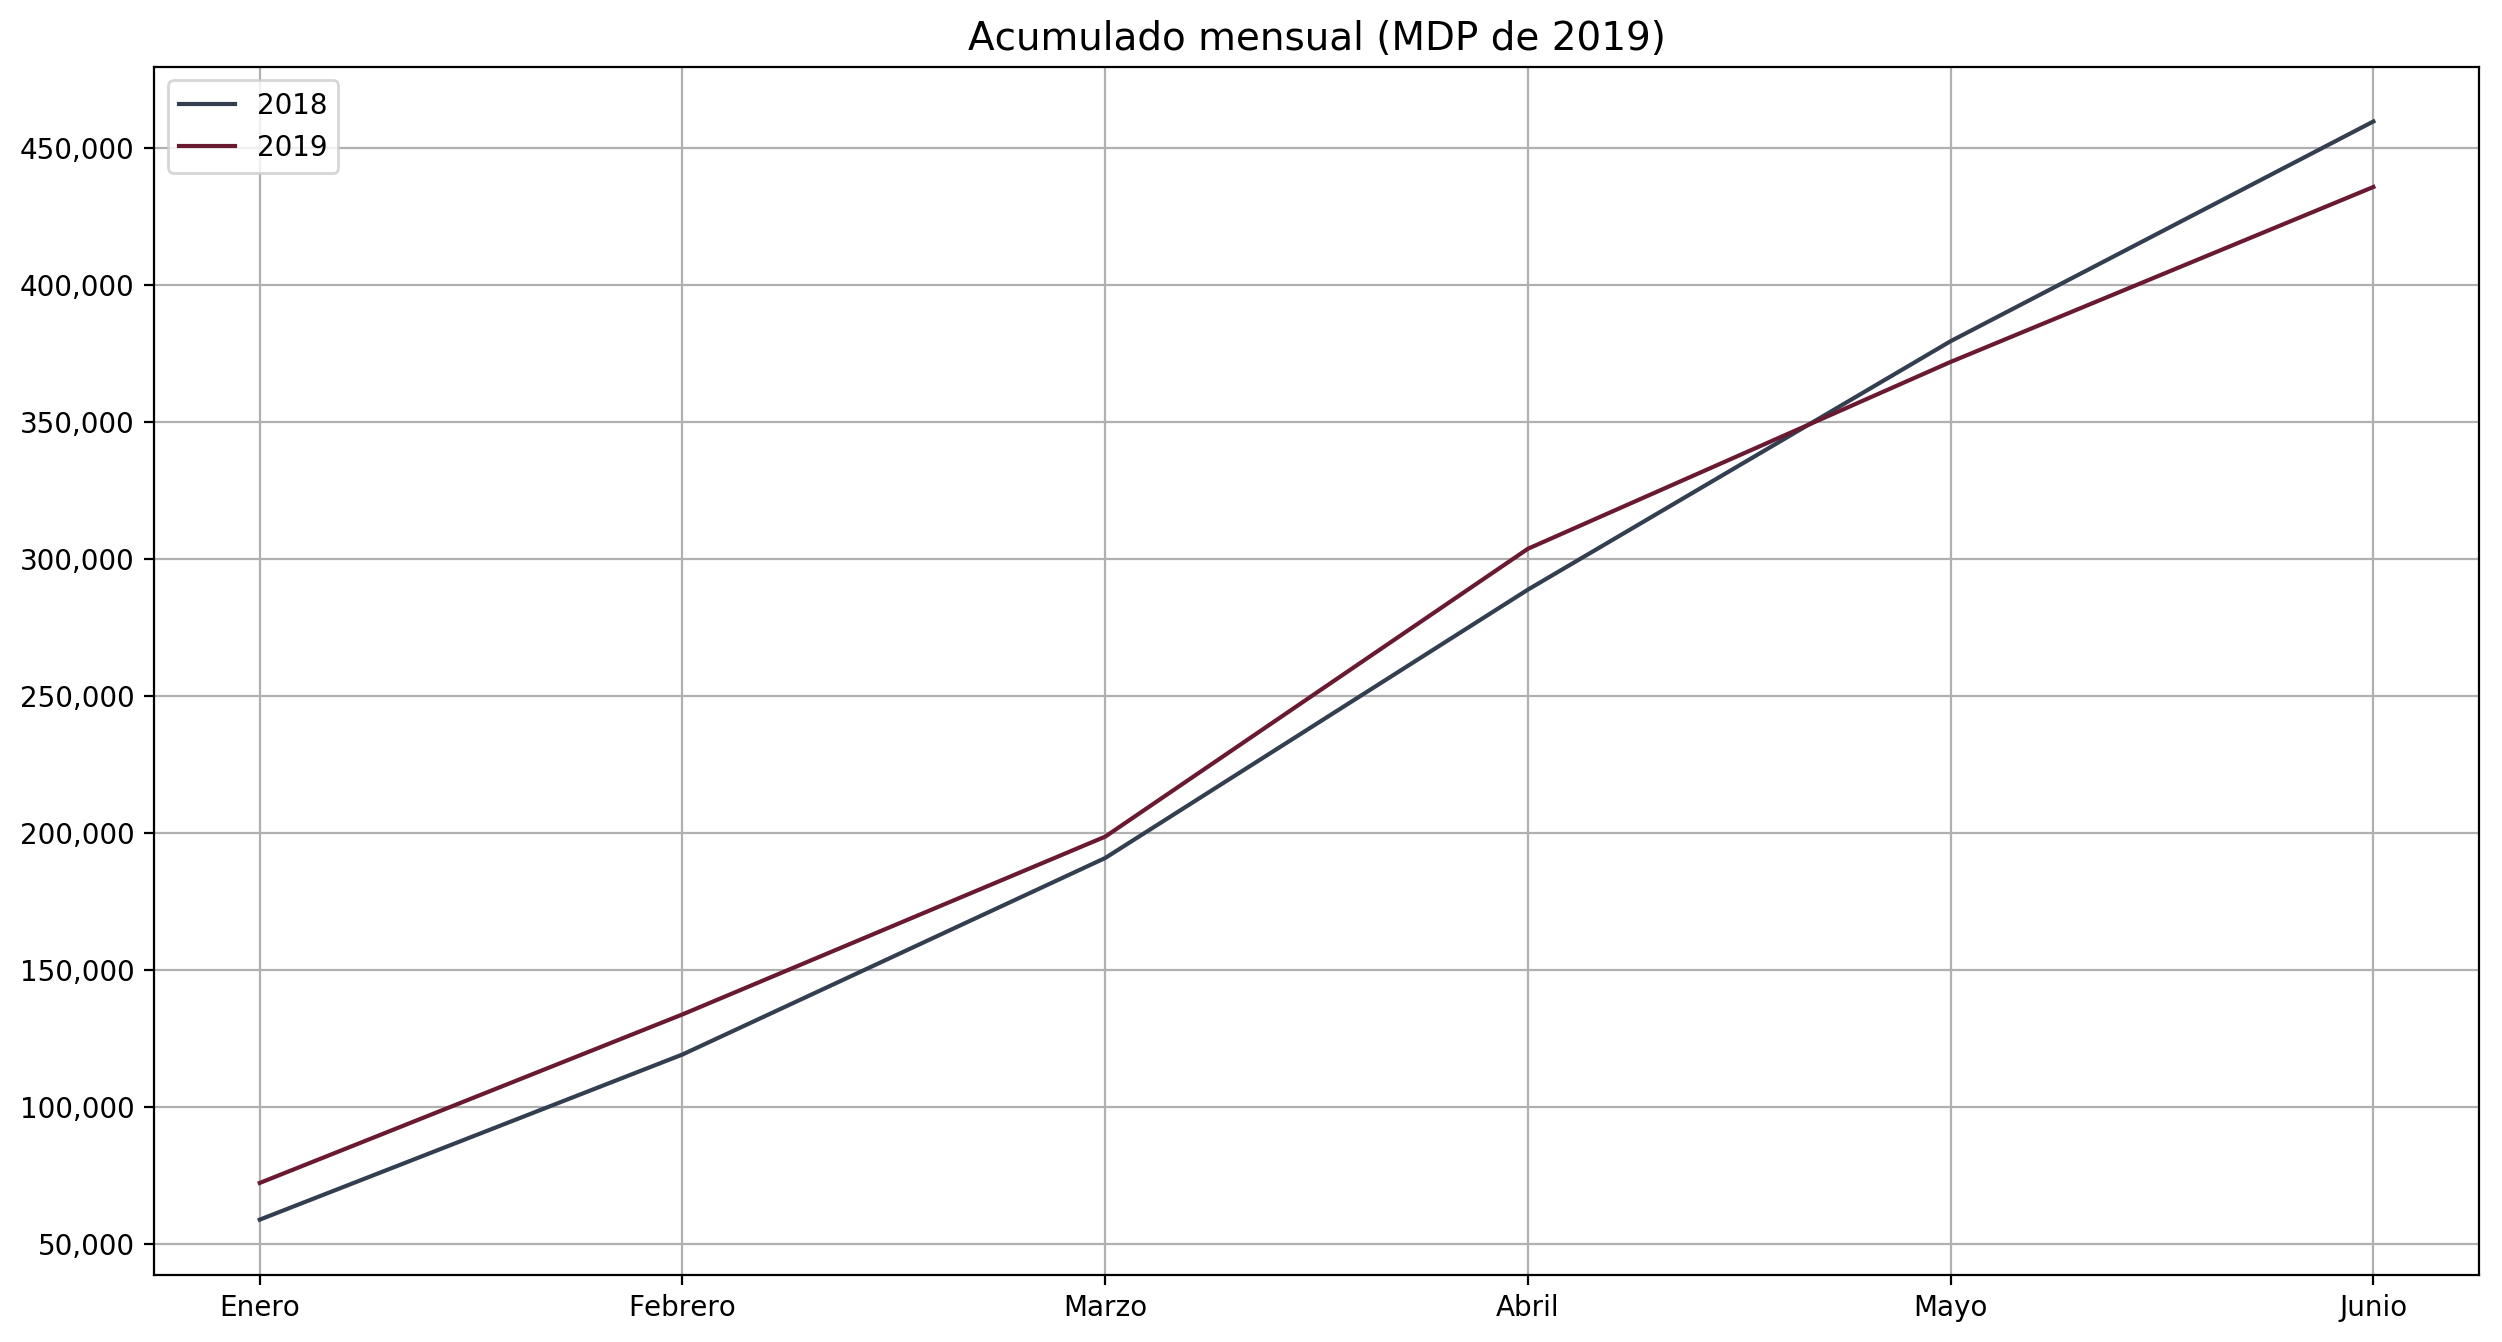

In [31]:
descriptive.plot_series(devcomp['isr_iva_dev_comp_(mdp)_r'],
                        title = 'Acumulado mensual (MDP de 2019)',
                        dpi=200)

In [32]:
devcomp = descriptive.cross_tab(df = ingresos_brutos,
                      cols = ['iva_bruto_(mdp)_r', 'isr_bruto_(mdp)_r', 'isr_iva_bruto_(mdp)_r'],
                      years = [2018, 2019],
                      ratios = False,
                      cumsum=True,
                      style=False)

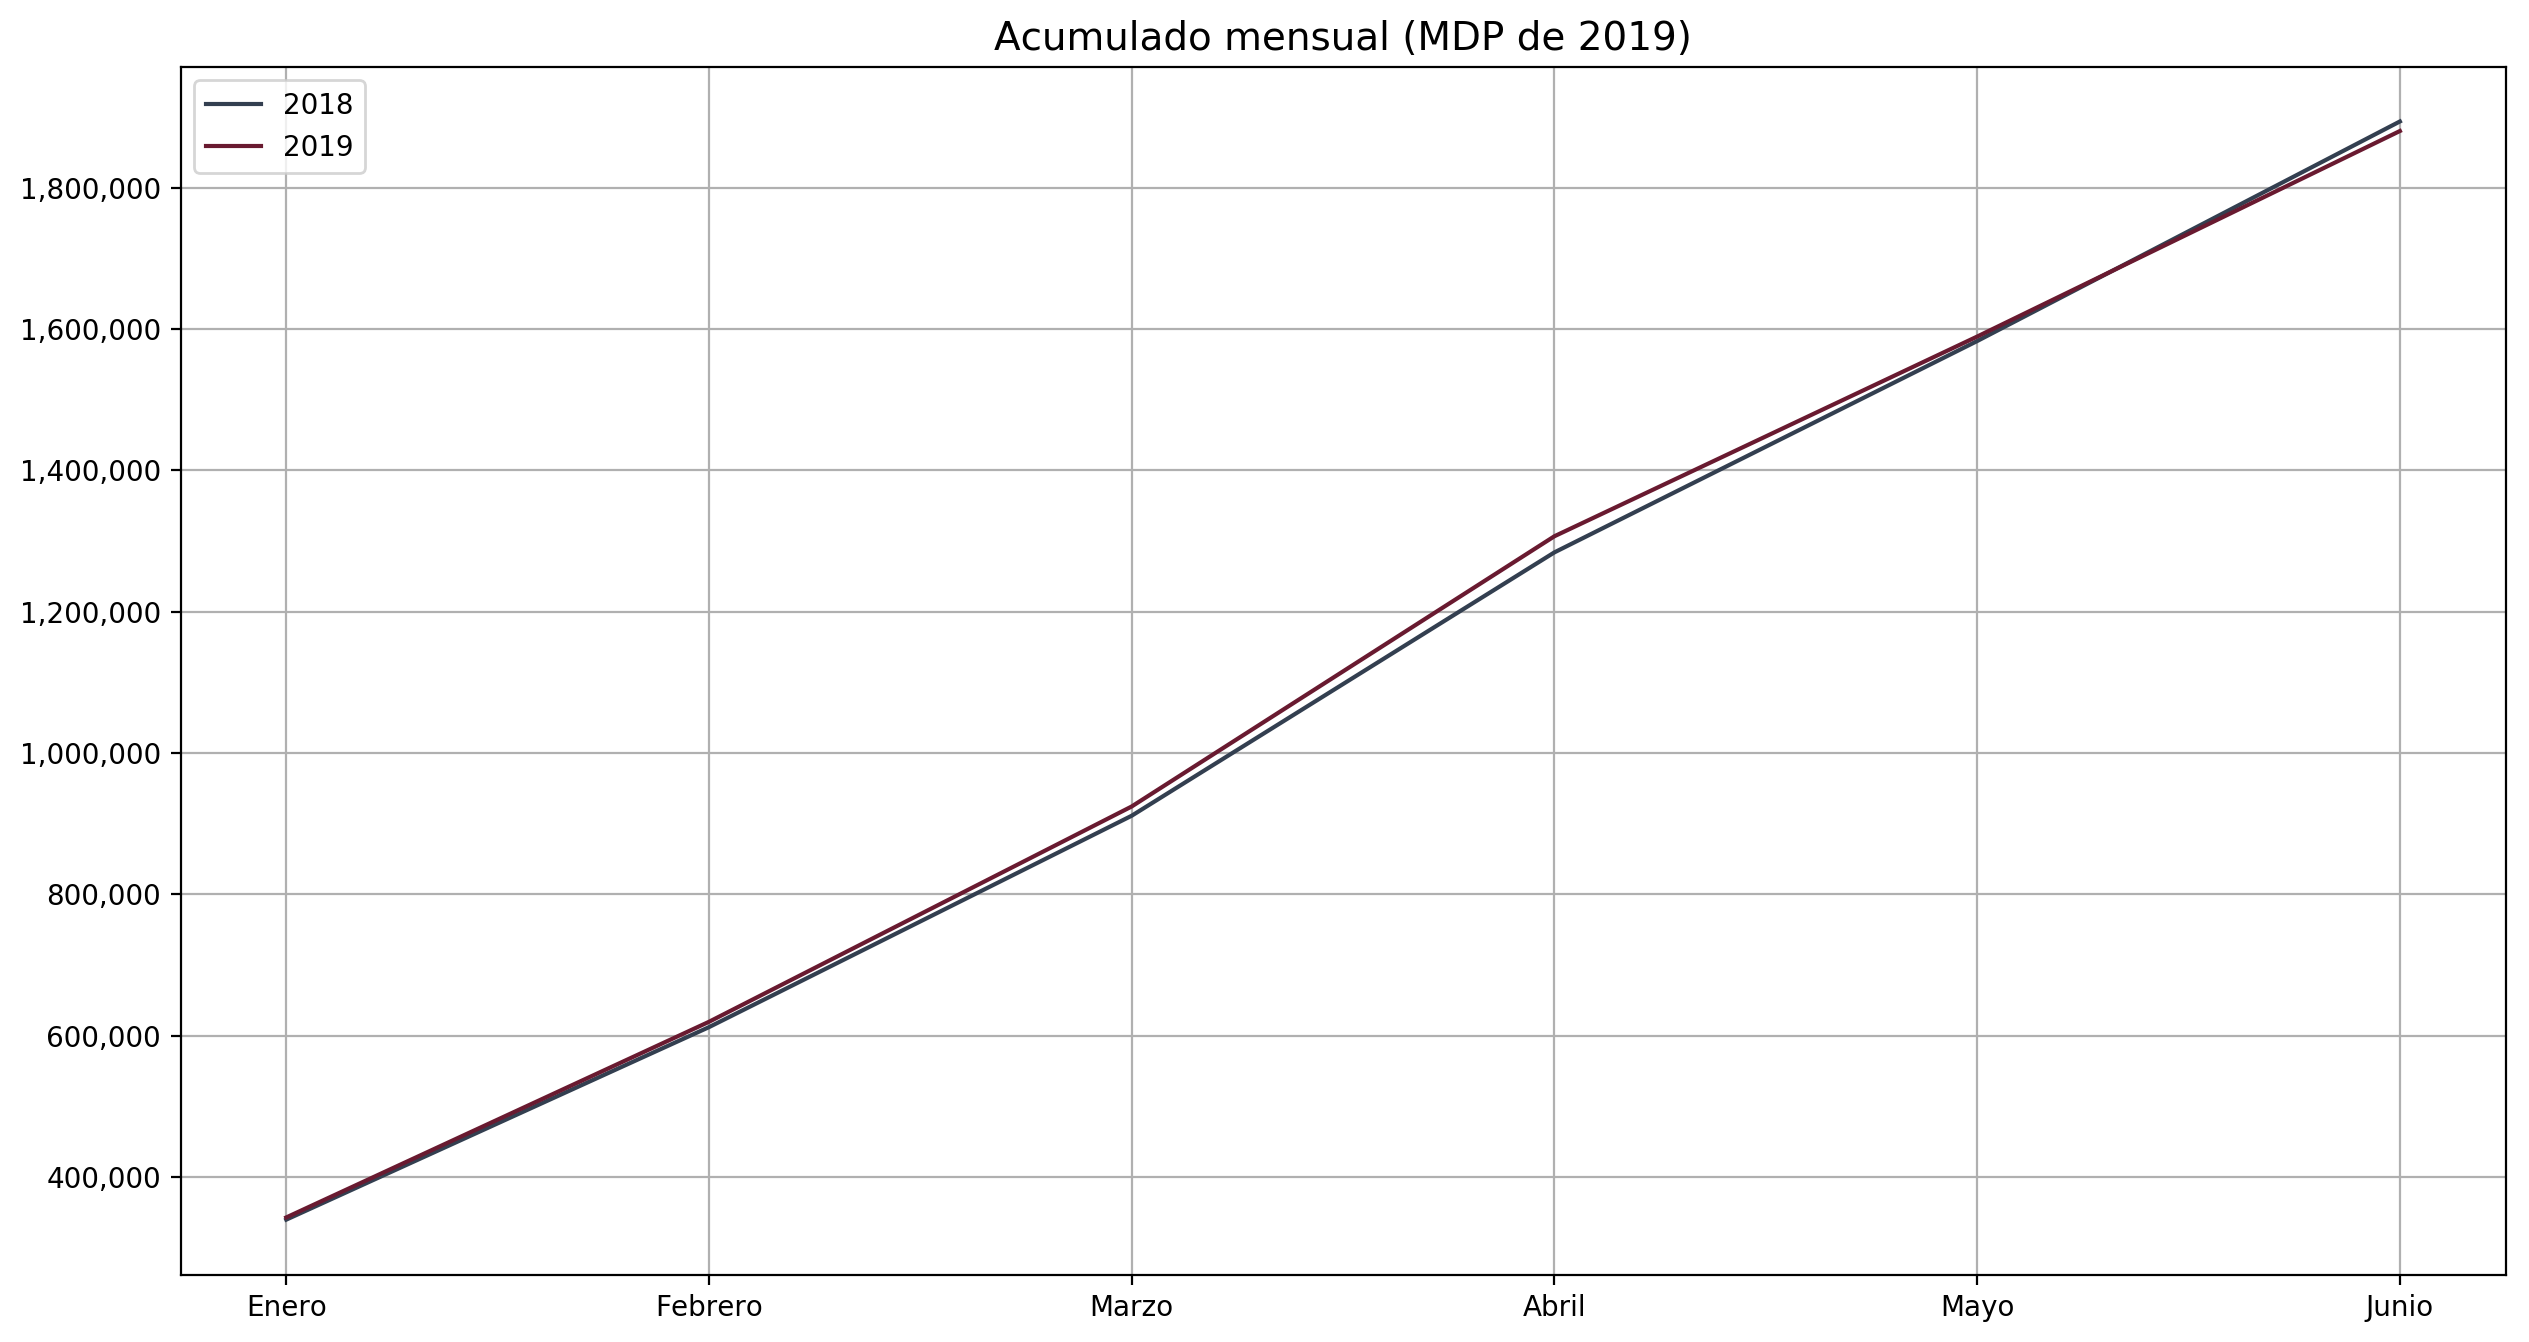

In [33]:
descriptive.plot_series(devcomp['isr_iva_bruto_(mdp)_r'],
                        title = 'Acumulado mensual (MDP de 2019)',
                        dpi=200)

Se ve comportamiento a la baja en compensaciones del IVA, cerrando Mayo de 2019 en 7,440 MDP, muy por debajo de la cifra de 2018 de alrededor de 26,484. Devoluciones de IVA, por su parte, incrementan. El valor para Mayo de 2019 es de 40,810 MDP, por encima del valor para mayo del 2018 de 35,359 MDP. En resumen, se observa una disminución en compoensaciones de 19,040 MDP y un incremento en devoluciones de 5,451 MDP, resultando en una reducción neta de 13,589 en los gastos del estado.

### % del Bruto

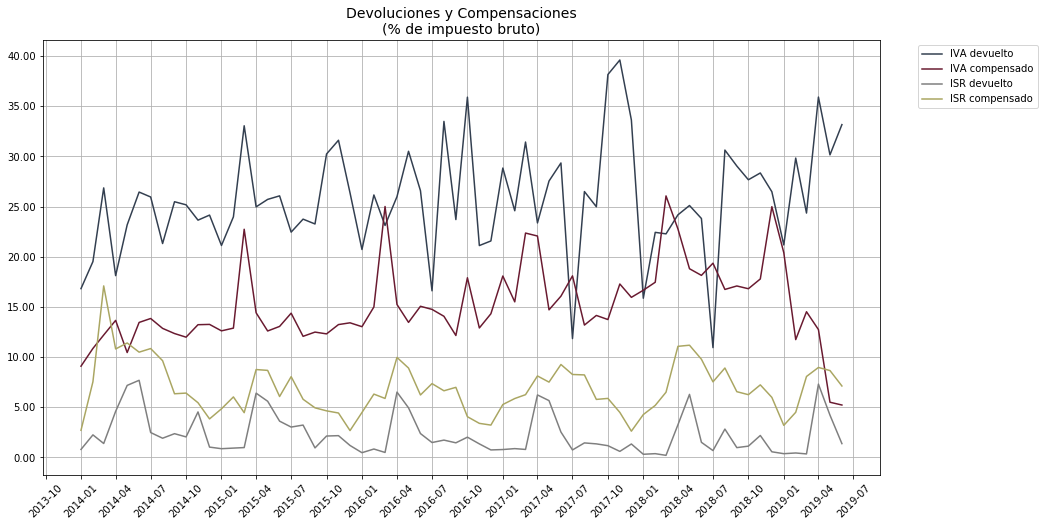

In [25]:
descriptive.plot_series(df = ingresos_brutos,
                        cols = ['iva_dev_%bruto', 'iva_comp_%bruto',
                                'isr_dev_%bruto', 'isr_comp_%bruto'],
                        legend= ['IVA devuelto', 'IVA compensado',\
                                 'ISR devuelto', 'ISR compensado'],
                        title='Devoluciones y Compensaciones',
                        subtitle='(% de impuesto bruto)',ticks='quarterly',
                        legend_out=True)

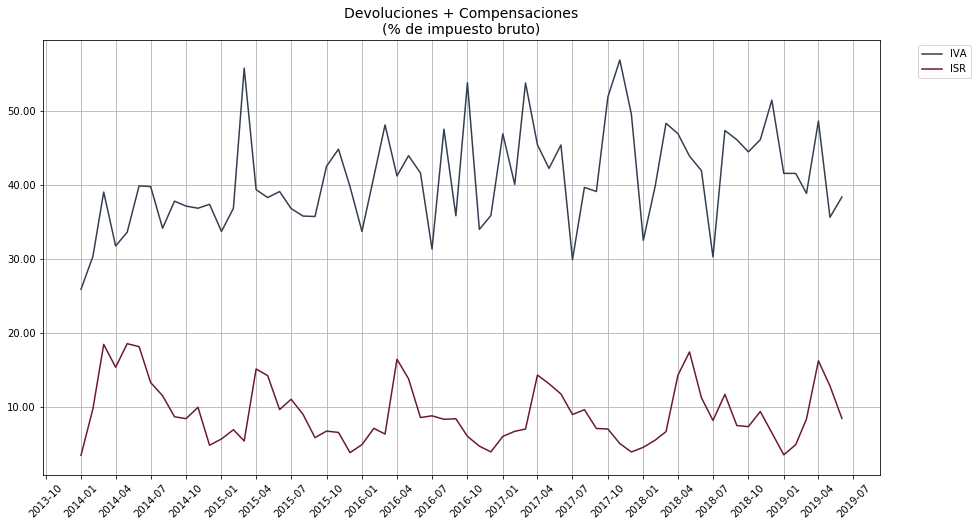

In [26]:
descriptive.plot_series(df = ingresos_brutos,
                        cols = ['iva_dev_comp_%bruto', 'isr_dev_comp_%bruto'],
                        legend= ['IVA', 'ISR'],
                        title='Devoluciones + Compensaciones',
                        subtitle='(% de impuesto bruto)',ticks='quarterly',
                        legend_out=True)

In [27]:
display(
descriptive.cross_tab(df = ingresos_brutos, 
                      cols = ['iva_dev_%bruto', 'iva_comp_%bruto', 'iva_dev_comp_%bruto'],
                      years=[2018, 2019], ratios=True,
                      cols_for_tot=[['iva_dev_(mdp)_r','iva_bruto_(mdp)_r'],
                                    ['iva_comp_(mdp)_r','iva_bruto_(mdp)_r'],
                                    ['iva_dev_comp_(mdp)_r','iva_bruto_(mdp)_r']],
                      for_plot=False, absolute_change=True))

descriptive.cross_tab(df = ingresos_brutos,
                      cols = ['isr_dev_%bruto', 'isr_comp_%bruto', 'isr_dev_comp_%bruto'],
                      years=[2018, 2019], ratios=True,
                      cols_for_tot=[['isr_dev_(mdp)_r','isr_bruto_(mdp)_r'],
                                    ['isr_comp_(mdp)_r','isr_bruto_(mdp)_r'],
                                    ['isr_dev_comp_(mdp)_r','isr_bruto_(mdp)_r']],
                      for_plot=False, absolute_change=True)

Devoluciones y compensaciones como porcentaje de los ingresos brutos por impuesto disminuyeron de 44 a 36% para el IVA y de 17 a 13% para el ISR comparando Mayo 2018 con Mayo 2019. Para lo que va del año, disminuyeron de 42% a 42.23% en IVA, y de 9.96% a 9.74% en ISR. 

# Eficiencia recaudatoria

Para analizar la eficiencia recaudatoria el primer paso es estimar el PIB para el segundo trimestre de 2019. Así podremos obtener un aproximado de eficiencia recaudatoria para Abri y para Mayo. El PIB se aproxima usando el IGAE
   - Usamos el crecimiento del IGAE de Abril 2018 a Abril 2019 para estimar el crecimiento del PIB del segundo trimestre de 2018 al segundo trimestre del 2019. 
   - Calculamos la desviación estándar del crecimiento del IGAE. Hacemos 4 escenarios de crecimiento adicionales: +/- 1 desviación estandar y +/- 0.5 desviaciones estándar

In [28]:
# Creamos cambio porcentual del igae y cambio porcentual del PIB
igae_pct_change = igae.pct_change(12)
# Para obtener el cambio porcentual obtengo el pibr_2019, solo los valores que no son NA (Porque si no, los
# toma como cero) Eso es lo que hago al hacer "pib_r_df.loc[pib_r_df.notna().all(1), 'pibr_2019']"
pib_r_pct_change = pib_r_df.loc[pib_r_df.notna().all(1), 'pibr_2019'].pct_change(12)

In [29]:
# Usamos .tail para ver últimos 5 datos. Se ven diferentes porque uno es un DataFrame y el otro es una Serie, 
# aunque el DataFrame solo es de una columna, así que prácticamente son lo mismo. Más adelante vamos a convertirlo
# todo en DataFrame
display(igae_pct_change.tail())
display(pib_r_pct_change.tail())

igae
fecha               
2018-12-01  0.000241
2019-01-01  0.011959
2019-02-01  0.010638
2019-03-01  0.012942
2019-04-01 -0.014146

fecha
2018-11-01    0.016890
2018-12-01    0.016890
2019-01-01    0.012463
2019-02-01    0.012463
2019-03-01    0.012463
Freq: MS, Name: pibr_2019, dtype: float64

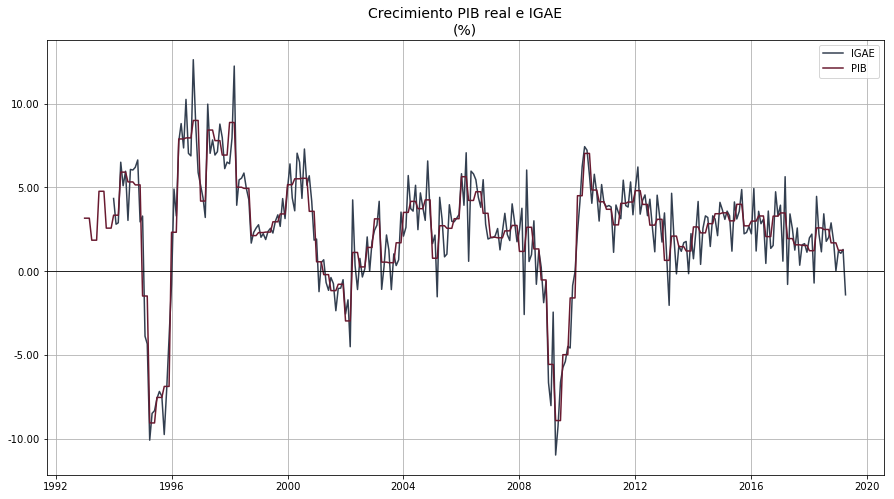

In [30]:
# Pasamos el cambio porcentual a valores porcentuales
igae_pct_change_plot = igae_pct_change * 100
# Juntamos ambos cambios porcentuales en un DF para graficarlos. El  merge es 'left' porque quiero incluir todo
# lo que esté en igae_pct_change aunque no esté en pib_r_pct_change. Al decir left_index = True y right_index=True
# digo que el merge se hará sobre los índices.
igae_pct_change_plot = igae_pct_change_plot.merge(pib_r_pct_change * 100, left_index=True,
                                                  right_index=True, how='left')
# Graficamos
descriptive.plot_series(igae_pct_change_plot, title='Crecimiento PIB real e IGAE',
                        subtitle='(%)', legend=['IGAE', 'PIB'],
                        hline=0)

In [32]:
# Creamos una lista en la que pondremos los nombres de las predicciones
prediction_names_l = ['pibr_2019']
# Obtenemos el último crecimiento porcentual haciendo .iloc[-1]. Lo convertimos a float porque queremos solo el
# número.
last_growth_igae = float(igae_pct_change.iloc[-1])
# Creamos un nuevo DataFrame sobre el cual pondremos las predicciones. SOlo usamos los valores después de 2014.
# Indico .copy() para que Pandas sepa que yo sé que estoy haciendo una copia y no me advierta al hacer
# modicaciones en la nueva DF.
pib_r_df_predict = pib_r_df.loc[pib_r_df.index >= '2014-01-01'].copy()
# Creamos el nombre de la variable que vamos a usar:
prediction_name = 'pib_r_2019_{0:.2f}%'.format(last_growth_igae * 100)
# Ampliamos lista con los nombres de las predicciones, esto lo usaremos mas adelante.
prediction_names_l.append(prediction_name)
# Vamos a crear una lista con los valores de crecimiento, lo usaremos mas adelante:
growth_rates = [last_growth_igae * 100]
# Creamos una nueva columna identica al pibr_2019 con el nombre 'pib_r_2019_igae'
pib_r_df_predict[prediction_name] = pib_r_df_predict['pibr_2019']
# Ampliamos el DataFrame para que incluya abril y mayo de 2019. 'MS' indica Month Start, que son las fechas
# que estamos usando.
pib_r_df_predict = pib_r_df_predict.reindex(pd.date_range('2014-01-01', '2019-06-01', freq='MS'))
# Obtengo el valor del pib que usaremos para predecir, que es el del segundo trimestre de 2018
prediction_pib_base = pib_r_df_predict.loc['2018-04-01', prediction_name]
# Asignamos el valor de la nueva variable para los meses de abril y mayo como la multiplicación de la
# valor base de la predicción * (1 + la tasa de crecimiento). Los convierto a float porque actualmente
# son Pandas Series de 1 observacion, y los necesitamos como numeros.
pib_r_df_predict.loc[pd.date_range('2019-04-01', '2019-06-01', freq='MS'), prediction_name] = \
    float(prediction_pib_base) * (1 + last_growth_igae)

In [33]:
# Veamos los valores predichos
pib_r_df_predict.tail()

pibr_2013     pibr_2019  pib_r_2019_-1.41%
2019-02-01  1.823610e+07  2.296015e+07       2.296015e+07
2019-03-01  1.823610e+07  2.296015e+07       2.296015e+07
2019-04-01           NaN           NaN       2.311590e+07
2019-05-01           NaN           NaN       2.311590e+07
2019-06-01           NaN           NaN       2.311590e+07

In [34]:
# Confirmemos que la tasa de crecimiento es la misma que la última tasa de crecimiento de IGAE.
# No hacer caso a la tasa de crecimiento que muestra para las variables sin predicción. 
display(pib_r_df_predict[prediction_name].pct_change(12).tail())
display(last_growth_igae)

2019-02-01    0.012463
2019-03-01    0.012463
2019-04-01   -0.014146
2019-05-01   -0.014146
2019-06-01   -0.014146
Freq: MS, Name: pib_r_2019_-1.41%, dtype: float64

-0.01414649335378848

In [35]:
# Añadiremos cuatro predicciones adicionales usando la desviación estándar del crecimiento del IGAE desde 2014
# = 0.015. Incluiremos cuatro predicciones usando crecimientos del IGAE de +/- 0.5std y +/- 1std
igae_pct_change.loc[igae_pct_change.index >= '2014-01-01'].describe()

igae
count  64.000000
mean    0.023552
std     0.014629
min    -0.014146
25%     0.012846
50%     0.023453
75%     0.033367
max     0.056421

In [36]:
# Guardamos la deviación estándard en una variable
igae_growth_std = float(igae_pct_change.loc[igae_pct_change.index >= '2014-01-01'].std())

In [37]:
# repetimos el procedimiento anterior para cada uno de los valores que multiplicarán la desviación estándar.
# Obtenemos el valor del pib que usaremos para predecir, que es el del segundo trimestre de 2018
# este paso lo podemos hacer afuera del loop porque es el mismo para todos los malores
# Vamos a crear una lista con los nombres de las predicciones, esto lo usaremos mas adelante.
prediction_pib_base = pib_r_df_predict.loc['2018-04-01', 'pibr_2019']
for val in [-1, -0.5, 0.5, 1]:
    # Obtenemos último crecimiento
    last_growth_igae = float(igae_pct_change.iloc[-1])
    # Modificamos último crecimiento sumando la multiplicación entre el valor del loop y la desviación estándar
    growth_to_use = last_growth_igae + (val* igae_growth_std)
    # Ampliamos la lista de las tasas de crecimiento
    growth_rates.append(growth_to_use * 100)
    #Creamos el nombre de la variable que vamos a usar. Cuando escribes un string '{}'.format(x), la x 
    # se colocará en lugar de los corchetes. {0:.3f} indica que la x será un numero y que queremos ver
    # solo 2 decimales.
    prediction_name = 'pib_r_2019_{0:.2f}%'.format(growth_to_use * 100)
    # Ampliamos la lista de las predicciones con el nuevo nombre.
    prediction_names_l.append(prediction_name)
    # Creamos una nueva columna identica al pibr_2019 con el nombre 'pib_r_2019_igae'
    pib_r_df_predict[prediction_name] = pib_r_df_predict['pibr_2019']
    # Asignamos el valor de la nueva variable para los meses de abril y mayo como la multiplicación de la
    # valor base de la predicción * (1 + la tasa de crecimiento). Los convierto a float porque actualmente
    # son Pandas Series de 1 observacion, y los necesitamos como numeros.
    pib_r_df_predict.loc[pd.date_range('2019-04-01', '2019-06-01', freq='MS'), prediction_name] = \
        float(prediction_pib_base) * (1 + growth_to_use)

In [38]:
pib_r_df_predict.tail(5)

pibr_2013     pibr_2019  pib_r_2019_-1.41%  pib_r_2019_-2.88%  \
2019-02-01  1.823610e+07  2.296015e+07       2.296015e+07       2.296015e+07   
2019-03-01  1.823610e+07  2.296015e+07       2.296015e+07       2.296015e+07   
2019-04-01           NaN           NaN       2.311590e+07       2.277289e+07   
2019-05-01           NaN           NaN       2.311590e+07       2.277289e+07   
2019-06-01           NaN           NaN       2.311590e+07       2.277289e+07   

            pib_r_2019_-2.15%  pib_r_2019_-0.68%  pib_r_2019_0.05%  
2019-02-01       2.296015e+07       2.296015e+07      2.296015e+07  
2019-03-01       2.296015e+07       2.296015e+07      2.296015e+07  
2019-04-01       2.294439e+07       2.328740e+07      2.345890e+07  
2019-05-01       2.294439e+07       2.328740e+07      2.345890e+07  
2019-06-01       2.294439e+07       2.328740e+07      2.345890e+07

## Calculamos valores porcentuales

In [39]:
# Para calcular la eviciencia tributaria, tenemos que hacer un loop sobre cada uno de los impuestos y sobre cada
# una de las predicciones. Para ello, creamos una lista de los impuestos que usaremos, y usaremos la lista que 
# creamos que tiene los nombres de las predicciones. También crearemos un nuevo DataFrame con los valores de
# eficiencia.
eficiencia_df = pd.DataFrame(index=ingresos_brutos.index)
impuestos_a_usar = ['iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r', 'isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r']
# Ampliamos la lista de prediction_names_l para que incluya el pib original. Esto serirá para graficar
for tax in impuestos_a_usar:
    for prediction_name in prediction_names_l:
        # Obtenemos el impuesto que usaremos como denominador
        impuesto = ingresos_brutos[tax]
        # Obtenemos la predicción que usaremos como denominador
        prediction_pib = pib_r_df_predict[prediction_name]
        # Creamos el nombre de la variable que crearemos. Será por ejemplo: 'iva_bruto_%PIB_-1.4%'
        # Para eso, eliminamos la ultima parte del nombre del impuesto, eliminamos la primera parte del
        # nombre de la predicción, y los juntamos con %PIB en medio
        nombre_variable_ef = tax.replace('(mdp)_r', '') + '%PIB_' + prediction_name.replace('pib_r_2019_', '')
        eficiencia_df[nombre_variable_ef] = (impuesto / prediction_pib) * 100

In [40]:
#Veamos los valores de eficiencia 
eficiencia_df.tail()

iva_bruto_%PIB_pibr_2019  iva_bruto_%PIB_-1.41%  \
fecha                                                         
2019-02-01                  0.568828               0.568828   
2019-03-01                  0.561273               0.561273   
2019-04-01                       NaN               0.572801   
2019-05-01                       NaN               0.604662   
2019-06-01                       NaN               0.566574   

            iva_bruto_%PIB_-2.88%  iva_bruto_%PIB_-2.15%  \
fecha                                                      
2019-02-01               0.568828               0.568828   
2019-03-01               0.561273               0.561273   
2019-04-01               0.581428               0.577082   
2019-05-01               0.613769               0.609181   
2019-06-01               0.575108               0.570809   

            iva_bruto_%PIB_-0.68%  iva_bruto_%PIB_0.05%  \
fecha                                                     
2019-02-01               0.568828              0.568828   
2019-03-01               0.561273              0.561273   
2019-04-01               0.568582              0.564426   
2019-05-01               0.600209              0.595821   
2019-06-01               0.562401              0.558290   

            iva_neto_%PIB_pibr_2019  iva_neto_%PIB_-1.41%  \
fecha                                                       
2019-02-01                 0.327401              0.327401   
2019-03-01                 0.337952              0.337952   
2019-04-01                      NaN              0.288279   
2019-05-01                      NaN              0.382197   
2019-06-01                      NaN              0.343438   

            iva_neto_%PIB_-2.88%  iva_neto_%PIB_-2.15%  iva_neto_%PIB_-0.68%  \
fecha                                                                          
2019-02-01              0.327401              0.327401              0.327401   
2019-03-01              0.337952              0.337952              0.337952   
2019-04-01              0.292621              0.290434              0.286156   
2019-05-01              0.387954              0.385054              0.379383   
2019-06-01              0.348611              0.346005              0.340909   

            iva_neto_%PIB_0.05%  isr_bruto_%PIB_pibr_2019  \
fecha                                                       
2019-02-01             0.327401                  0.636744   
2019-03-01             0.337952                  0.765759   
2019-04-01             0.284064                       NaN   
2019-05-01             0.376609                       NaN   
2019-06-01             0.338417                       NaN   

            isr_bruto_%PIB_-1.41%  isr_bruto_%PIB_-2.88%  \
fecha                                                      
2019-02-01               0.636744               0.636744   
2019-03-01               0.765759               0.765759   
2019-04-01               1.081265               1.097551   
2019-05-01               0.617530               0.626831   
2019-06-01               0.691664               0.702082   

            isr_bruto_%PIB_-2.15%  isr_bruto_%PIB_-0.68%  \
fecha                                                      
2019-02-01               0.636744               0.636744   
2019-03-01               0.765759               0.765759   
2019-04-01               1.089347               1.073302   
2019-05-01               0.622146               0.612982   
2019-06-01               0.696834               0.686571   

            isr_bruto_%PIB_0.05%  isr_neto_%PIB_pibr_2019  \
fecha                                                       
2019-02-01              0.636744                 0.587791   
2019-03-01              0.765759                 0.684571   
2019-04-01              1.065455                      NaN   
2019-05-01              0.608501                      NaN   
2019-06-01              0.681551                      NaN   

            isr_neto_%PIB_-1.41%  isr_neto_%PIB_

# Gráfica 1
### Eficiencia recaudartoria de IVA e ISR bruto

In [41]:
## Para graficar, necesitamos varias cosas:
## 1. Crear un nuevo DF que tenga NAN para todas las variables predichas hasta febrero 2019. Esto es para
## que la variable observada pueda llevar el color primario.
eficiencia_df_to_plot = eficiencia_df.copy()
base_vars = (['iva_bruto_%PIB_pibr_2019', 'iva_neto_%PIB_pibr_2019',
              'isr_bruto_%PIB_pibr_2019', 'isr_neto_%PIB_pibr_2019'])
# prediction_vars van a ser las variables en eficiencia_df que no están en base_vars. Esas serán las que se cambien
# por NAs
prediction_vars = [col for col in eficiencia_df.columns if col not in base_vars]

# Cambiando por NA's
eficiencia_df_to_plot.loc[pd.date_range('2014-01-01', '2019-02-01', freq='MS'), prediction_vars] = np.nan

## 2. Lista de las variables que vamos a graficar en cada gráfica.
## 3. Lista de los nombre que queremos que las variables lleven en la legenda.

#Vamos a usar la lista de tasas de crecimiento en orden ascendente
growth_rates = sorted(growth_rates)

# Vamos a crear un diccionario de graficas:
graph_vars_dict = {}

# Hacer un loop para cada una de las siguientes variables:
for tax in ['iva_bruto', 'iva_neto', 'isr_bruto', 'isr_neto']:
    # Para cada una de las variables, añadiremos al diccionario una lista con los diferentes nombres de las variables
    # de eficiencia. [tax + '_%PIB_{0:.2f}%'.format(g) for g in growth_rates] crea una lista que se verá así:
    # ['iva_bruto__%PIB_-2.88%', iva_bruto__%PIB_-2.15%...]
    # A esa lista le faltará la eficiencia sin predicciones, y por eso hacemos append después.
    graph_vars_dict[tax] = [tax + '_%PIB_pibr_2019']
    graph_vars_dict[tax] += [tax + '_%PIB_{0:.2f}%'.format(g) for g in growth_rates]


# Para los labels, seguiremos un procedimiento simiar
graph_labels = ['PIB Observado']
graph_labels += ['Predicción PIB: {0:.2f}%'.format(g) for g in growth_rates]


In [42]:
# graph_vars_dict

In [43]:
# graph_labels_dict

In [44]:
# Vamos a escribir el footnote de las gráficas
footnote = '''
Pronóstico de crecimiento del PIB en el segundo trimestre igual al crecimiento anual del IGAE de Abril 2019 de {0:.2f}%
+/- 0.5 y 1 desviaciones estándar del crecimiento del IGAE ({1:.2f}%)'''\
.format(last_growth_igae * 100, igae_growth_std * 100)

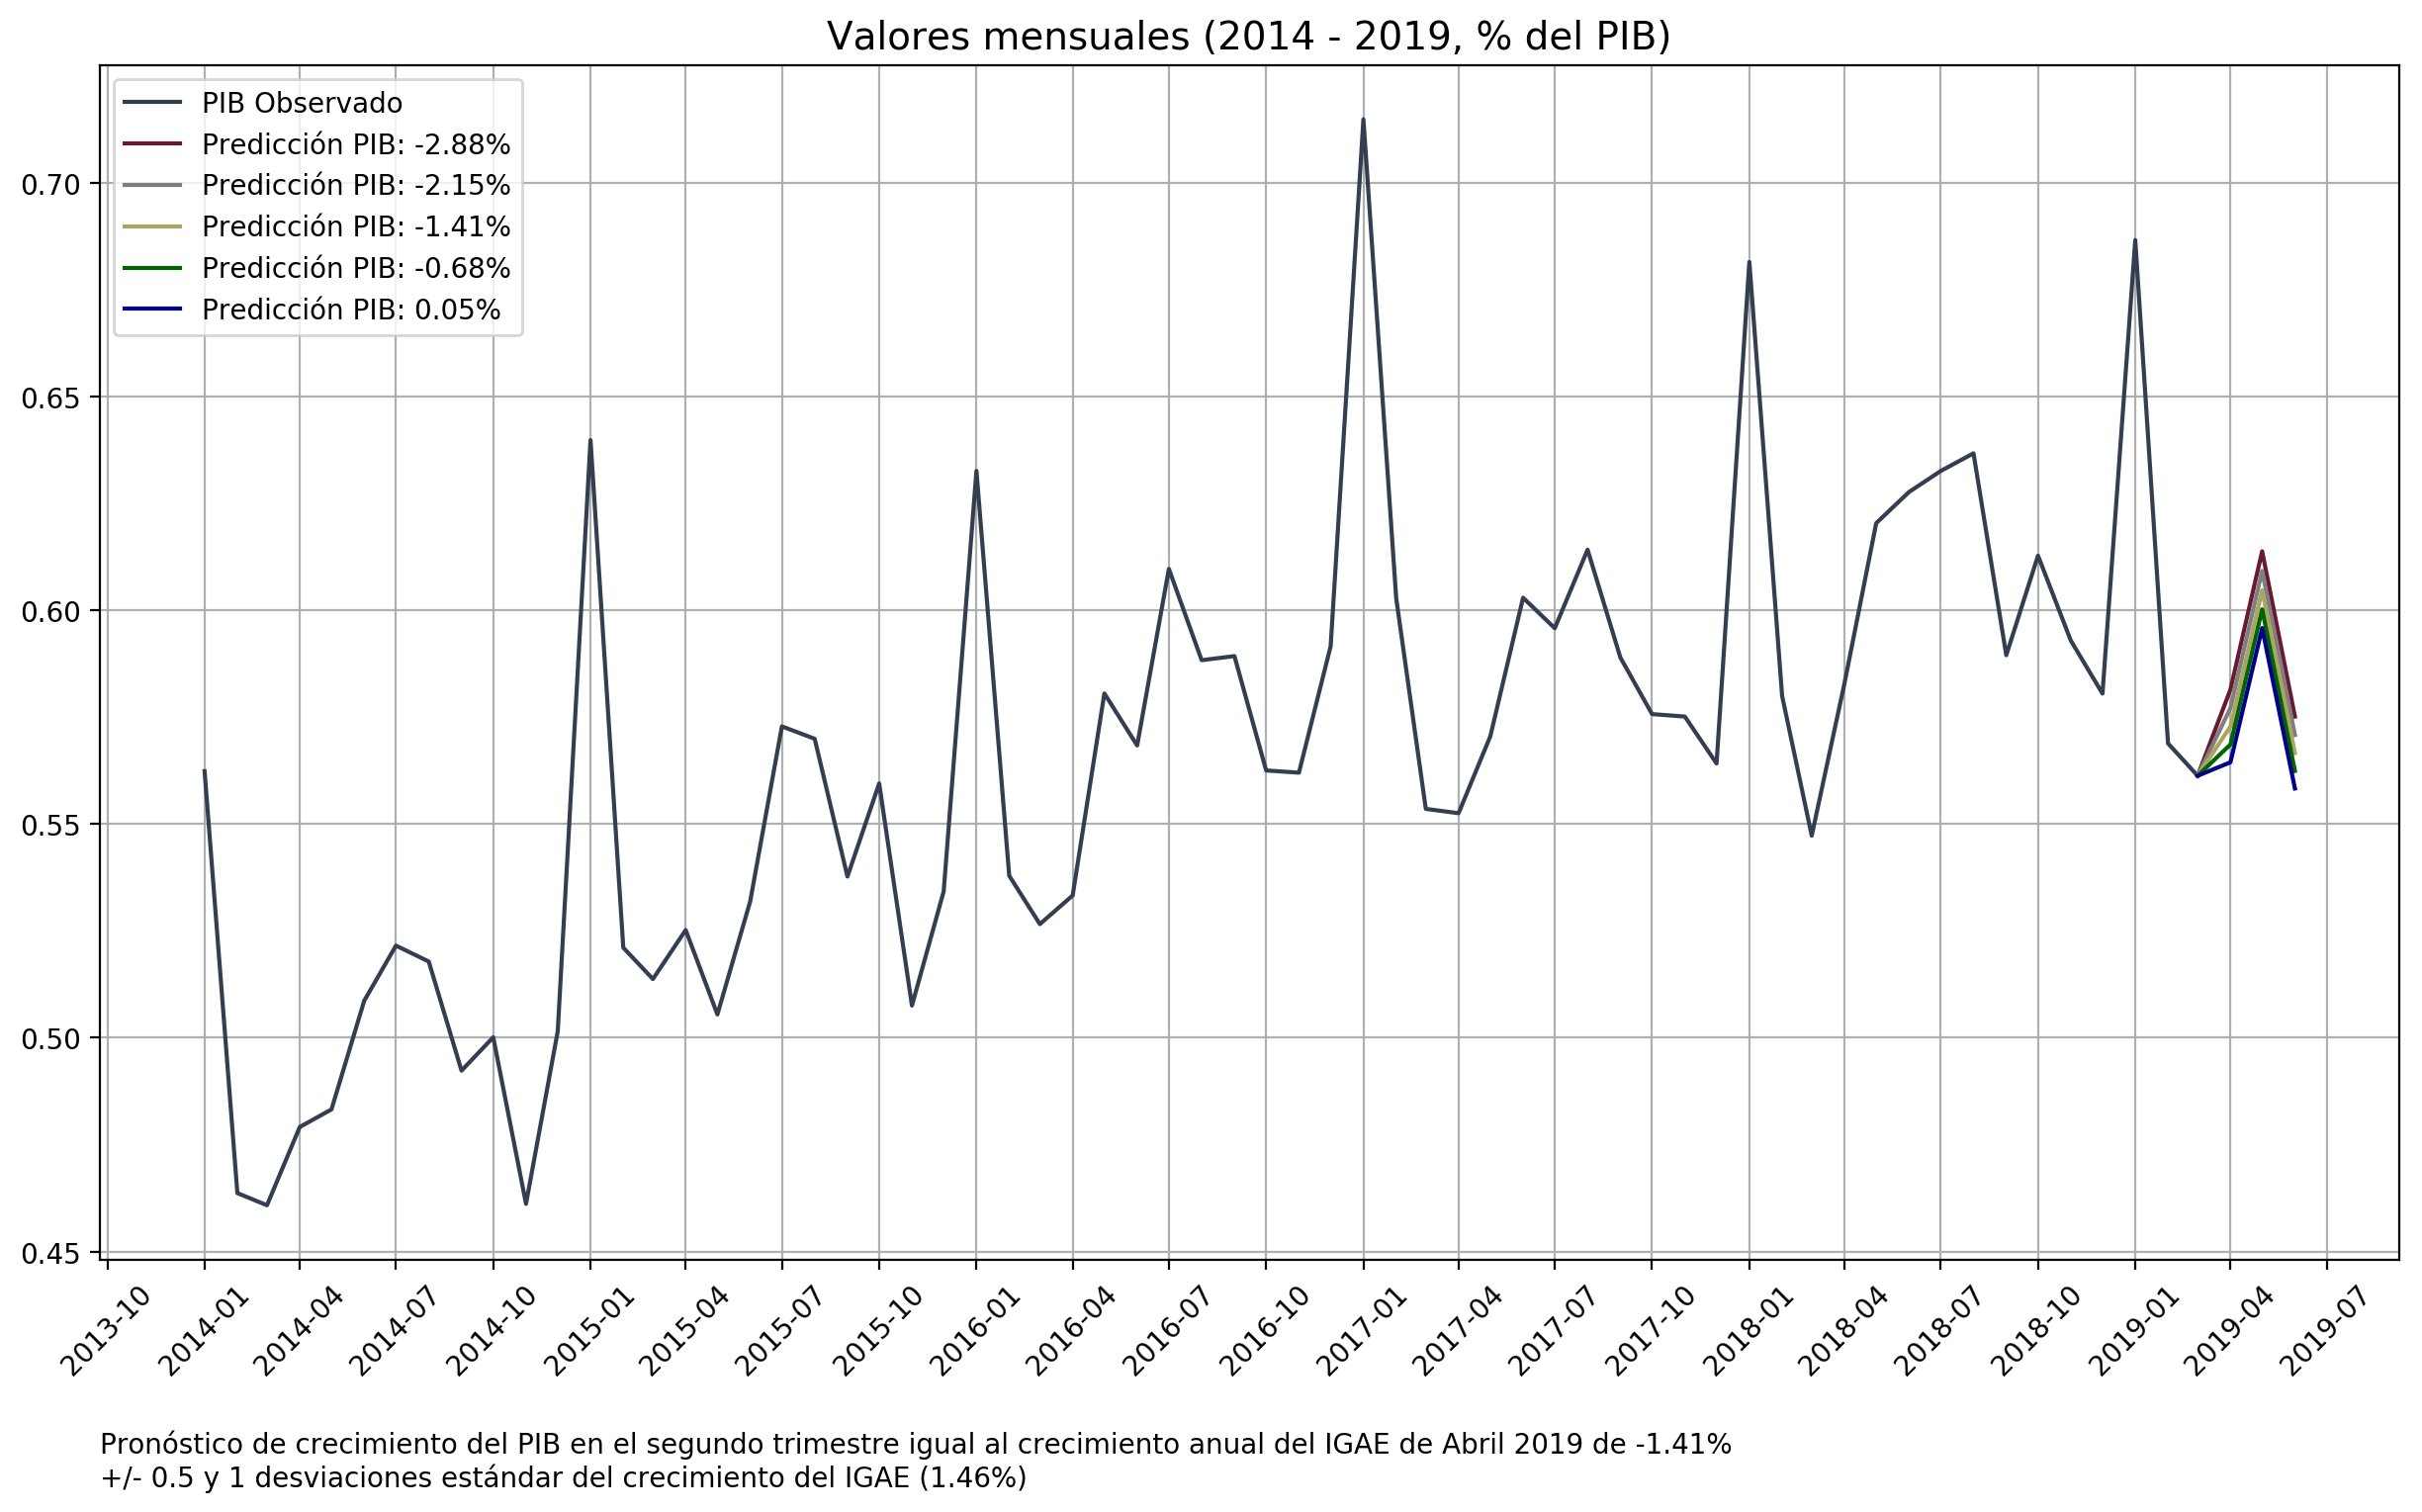

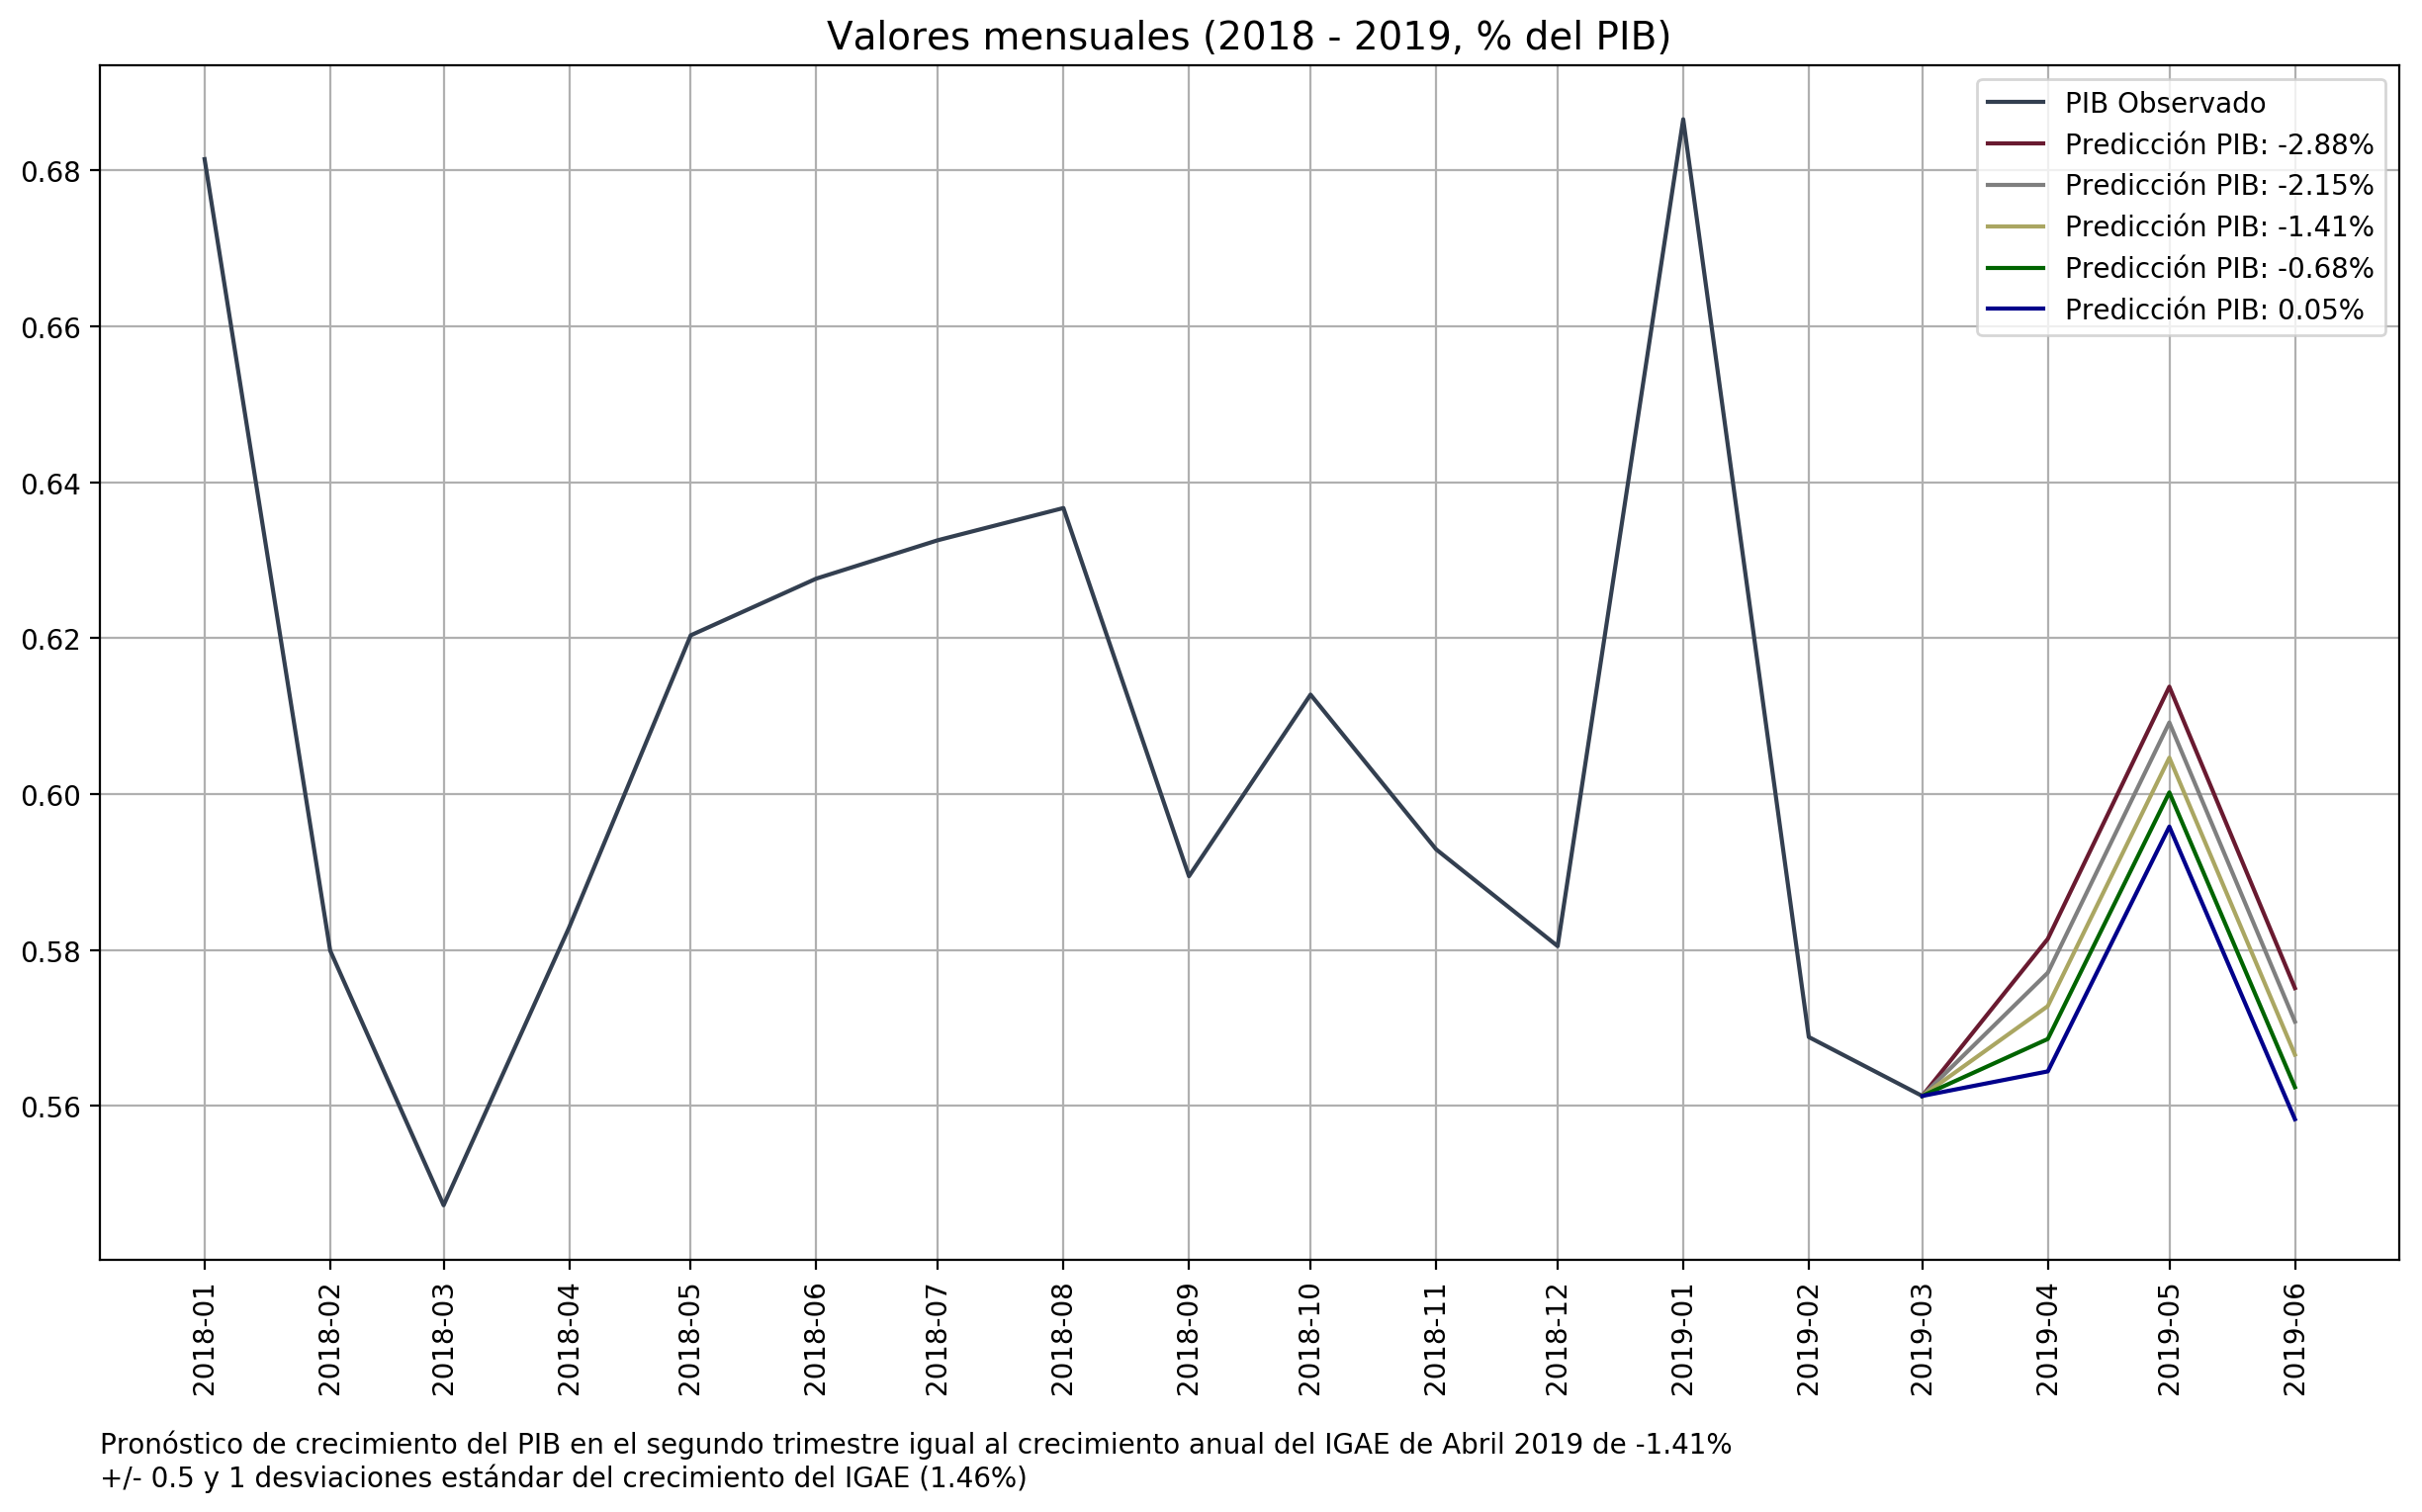

In [46]:
# Hacemos graficas para IVA
# descriptive.plot_series(df=eficiencia_df_to_plot, 
#                         cols=graph_vars_dict['iva_bruto'], 
#                         legend=graph_labels,
#                         title='Eficiencia recaudatoria del IVA Bruto',
#                         subtitle='Valores mensuales (2014 - 2019, % del PIB)', ticks='quarterly', 
#                         save_to='../figures/eficiencia_iva_bruto_mens_2014-01-01.png',
#                         dpi=200,
#                         footnote=footnote)
descriptive.plot_series(df=eficiencia_df_to_plot, 
                        cols=graph_vars_dict['iva_bruto'], 
                        legend=graph_labels,
                        title='Valores mensuales (2014 - 2019, % del PIB)',
                        ticks='quarterly', 
                        save_to='../figures/eficiencia_iva_bruto_mens_2014-01-01_notit.png',
                        dpi=200,
                        footnote=footnote)
# descriptive.plot_series(df=eficiencia_df_to_plot, 
#                         cols=graph_vars_dict['iva_bruto'], 
#                         legend=graph_labels,
#                         title='Eficiencia recaudatoria del IVA Bruto',
#                         subtitle='Valores mensuales (2018 - 2019, % del PIB)', 
#                         ticks='monthly',
#                         min_date='2018-01-01',
#                         save_to='../figures/eficiencia_iva_bruto_mens_2018-01-01.png',
#                         dpi=200,
#                         footnote=footnote)
descriptive.plot_series(df=eficiencia_df_to_plot, 
                        cols=graph_vars_dict['iva_bruto'], 
                        legend=graph_labels,
                        title='Valores mensuales (2018 - 2019, % del PIB)', 
                        ticks='monthly',
                        min_date='2018-01-01',
                        save_to='../figures/eficiencia_iva_bruto_mens_2018-01-01_notit.png',
                        dpi=200,
                        footnote=footnote)

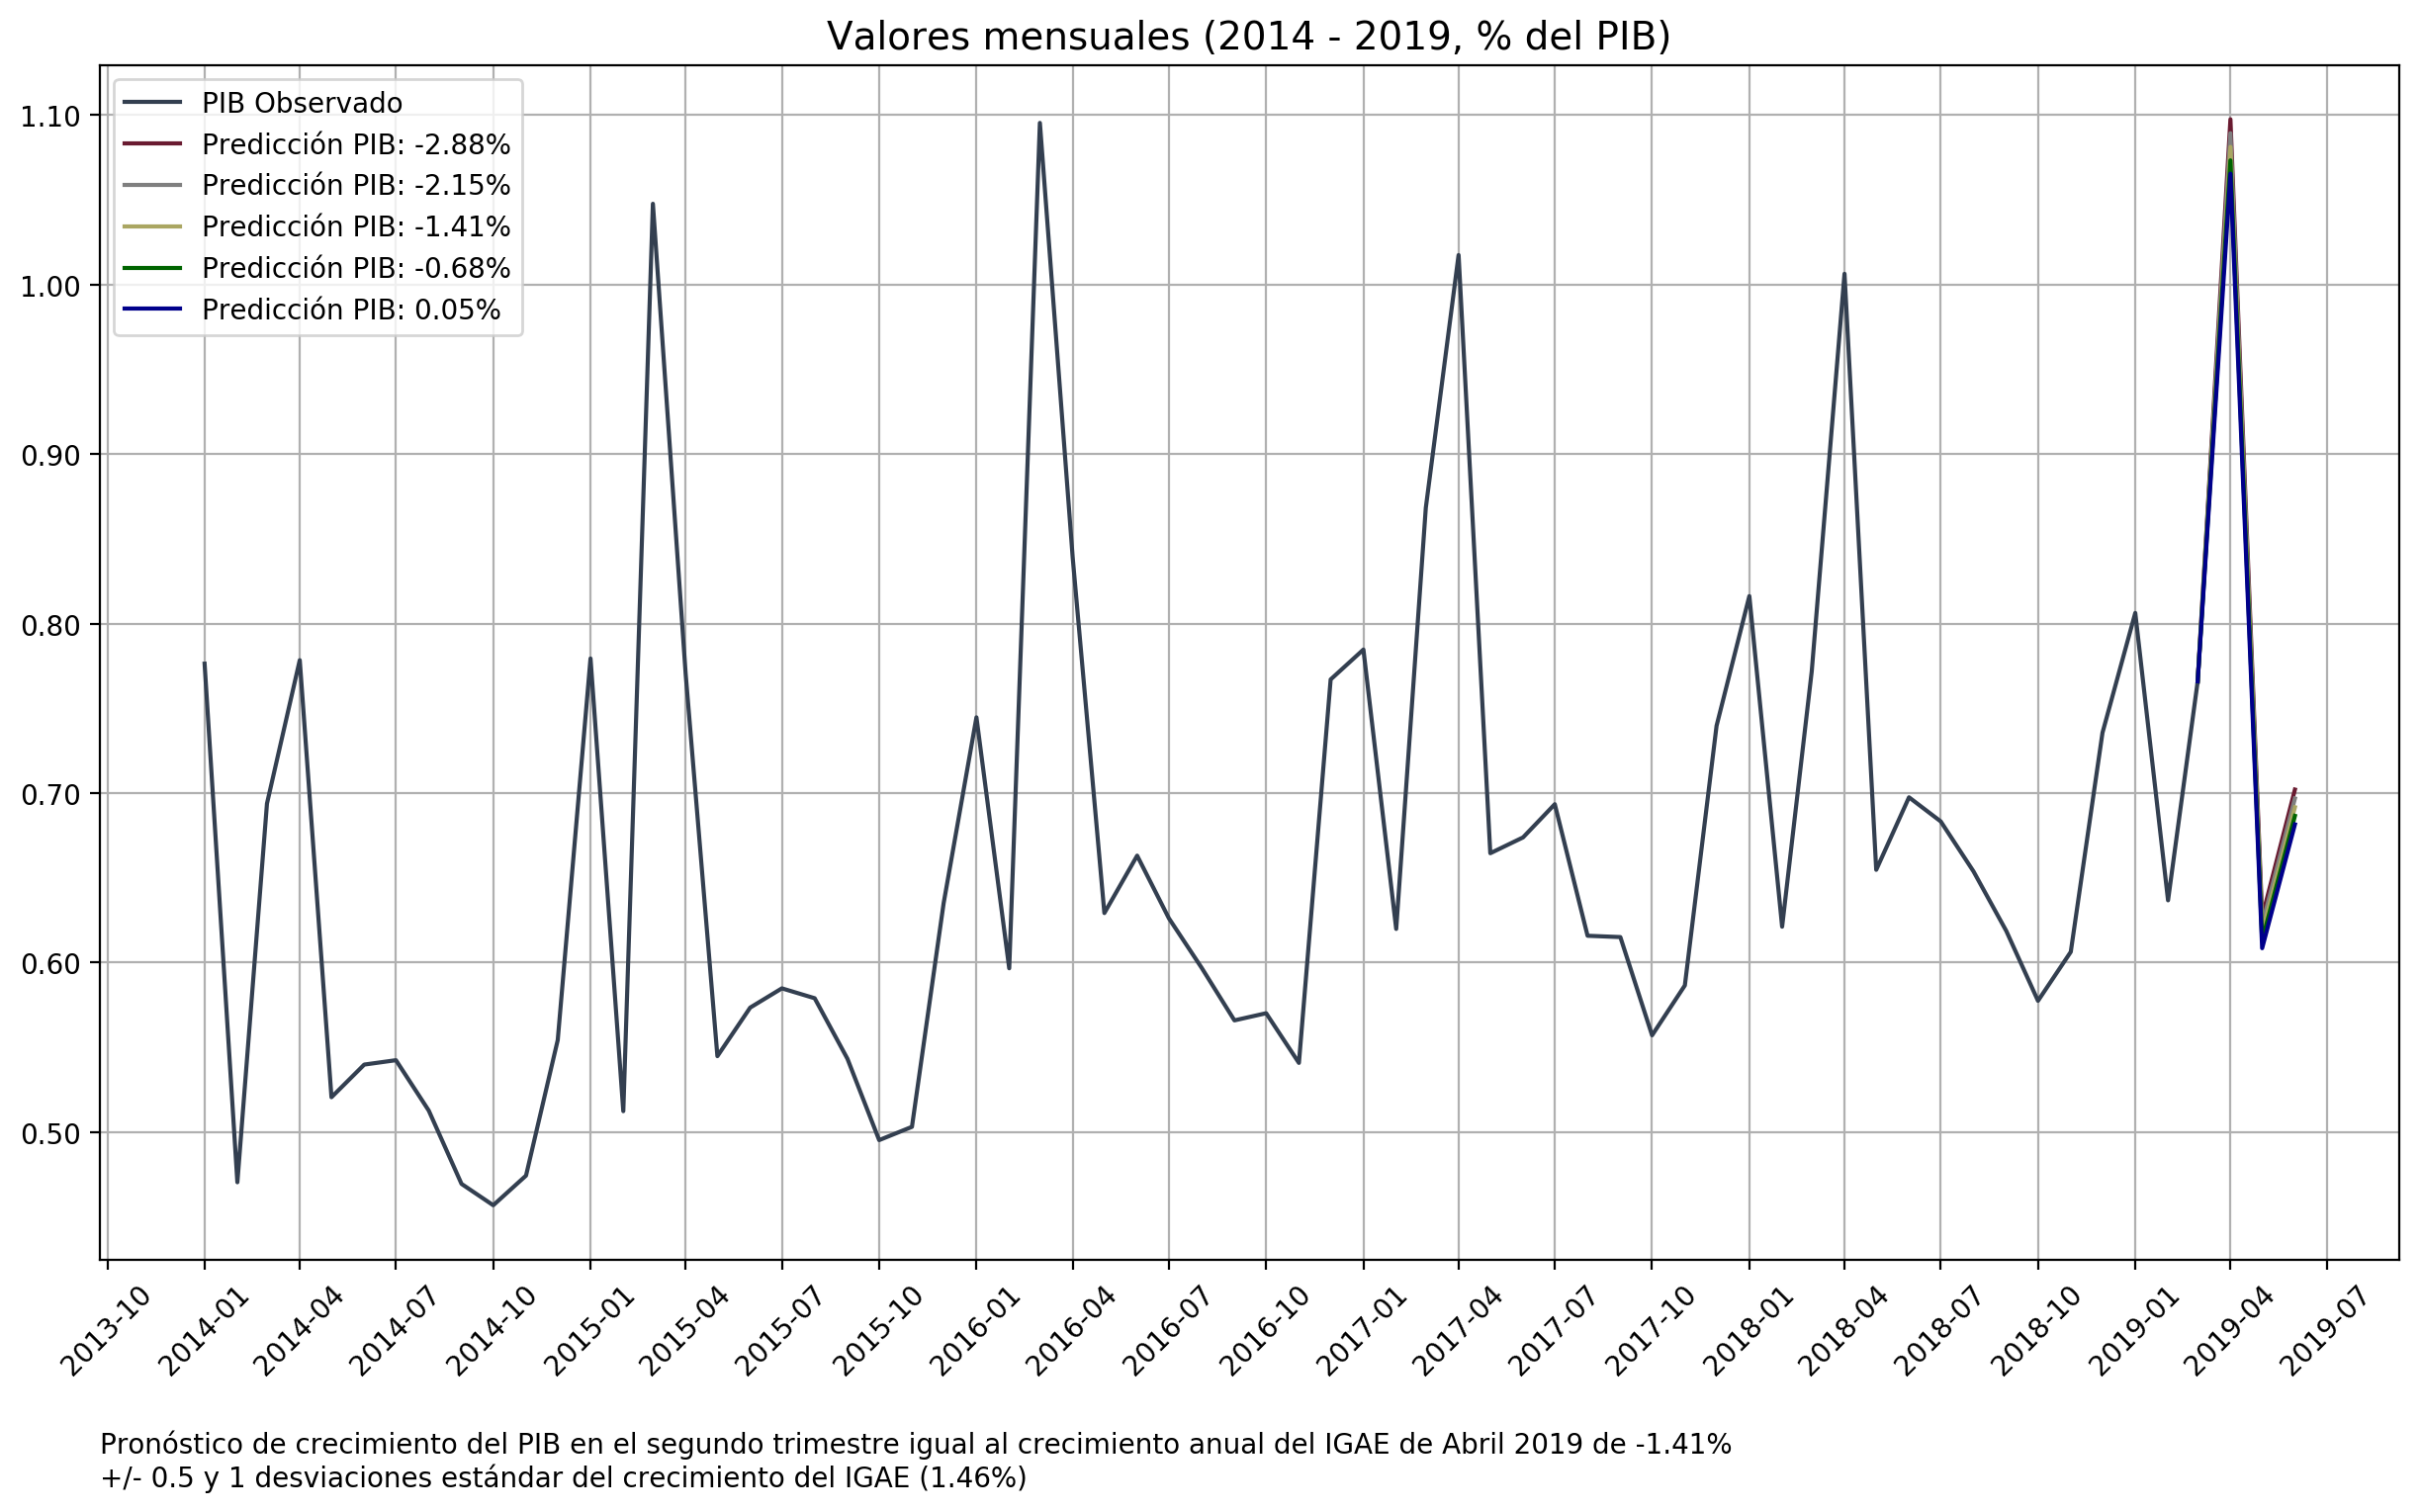

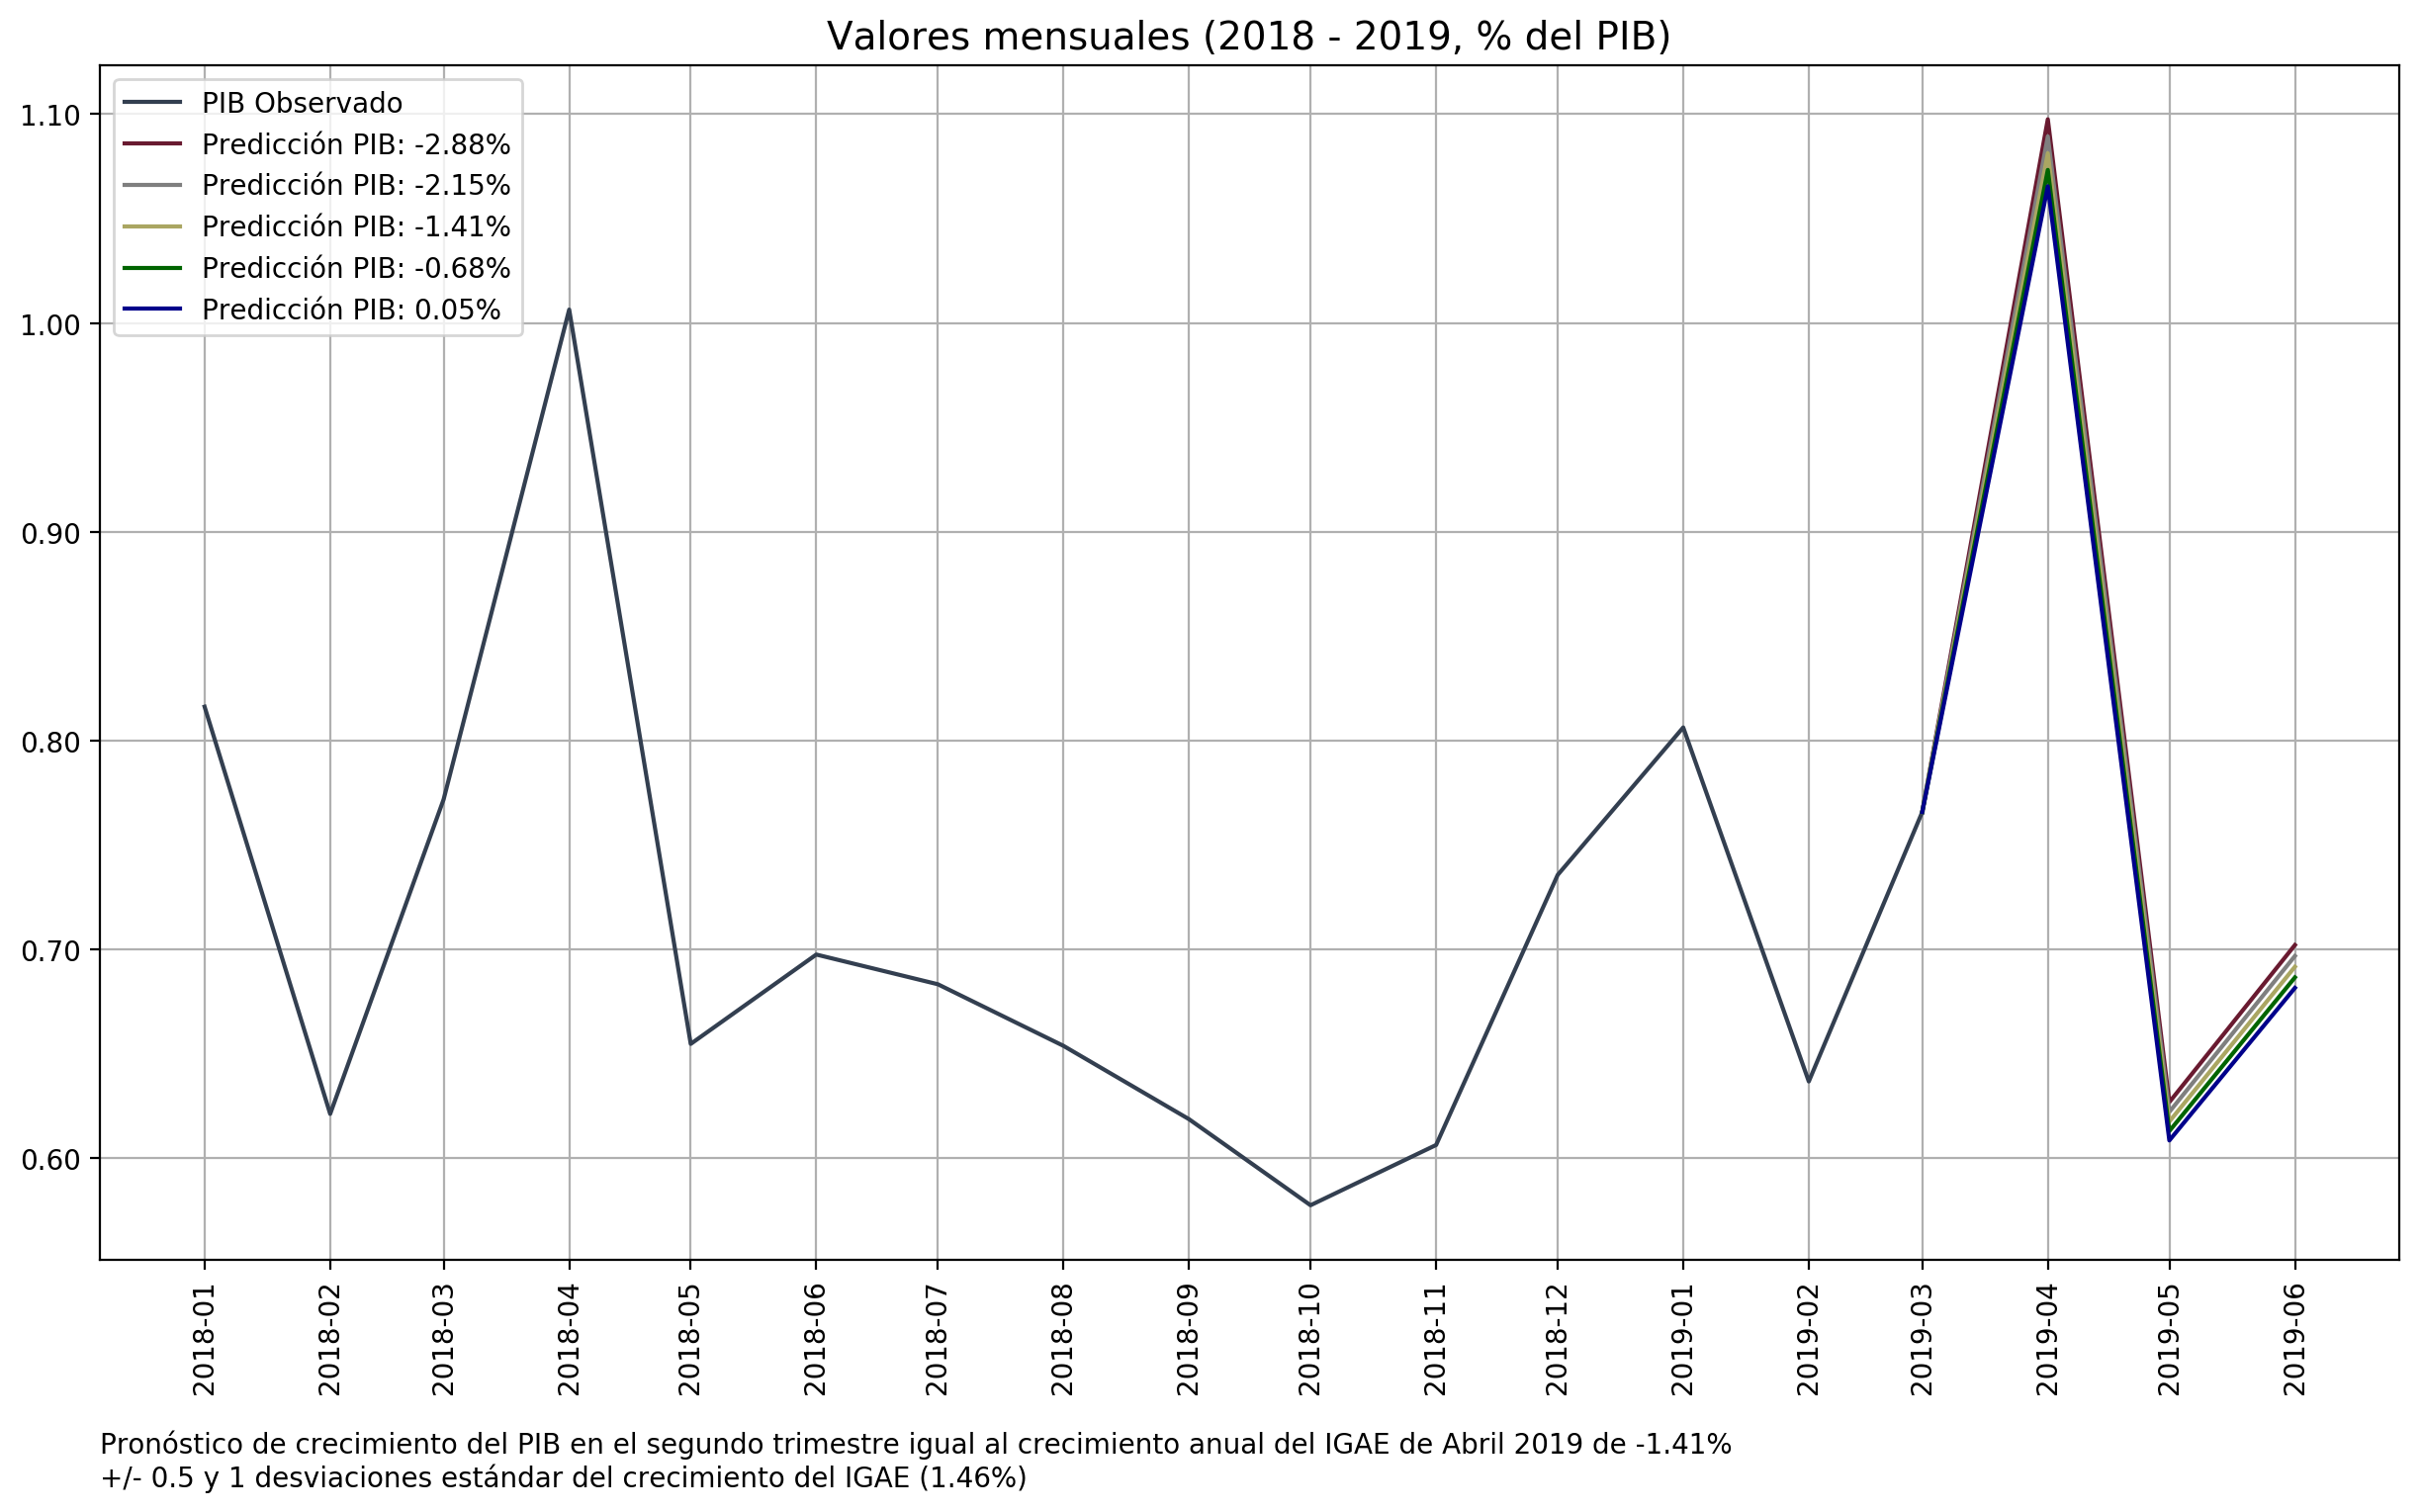

In [48]:
# HAcemos graficas para ISR

# Hacemos graficas para IVA
# descriptive.plot_series(df=eficiencia_df_to_plot, 
#                         cols=graph_vars_dict['isr_bruto'], 
#                         legend=graph_labels,
#                         title='Eficiencia recaudatoria del ISR Bruto',
#                         subtitle='Valores mensuales (2014 - 2019, % del PIB)', ticks='quarterly', 
#                         save_to='../figures/eficiencia_isr_bruto_mens_2014-01-01.png',
#                         dpi=200,
#                         footnote=footnote)
descriptive.plot_series(df=eficiencia_df_to_plot, 
                        cols=graph_vars_dict['isr_bruto'], 
                        legend=graph_labels,
                        title='Valores mensuales (2014 - 2019, % del PIB)', ticks='quarterly', 
                        save_to='../figures/eficiencia_isr_bruto_mens_2014-01-01_notit.png',
                        dpi=200,
                        footnote=footnote)
# descriptive.plot_series(df=eficiencia_df_to_plot, 
#                         cols=graph_vars_dict['isr_bruto'], 
#                         legend=graph_labels,
#                         title='Eficiencia recaudatoria del ISR Bruto',
#                         subtitle='Valores mensuales (2018 - 2019, % del PIB)', 
#                         ticks='monthly',
#                         min_date='2018-01-01',
#                         save_to='../figures/eficiencia_isr_bruto_mens_2018-01-01.png',
#                         dpi=200,
#                         footnote=footnote)
descriptive.plot_series(df=eficiencia_df_to_plot, 
                        cols=graph_vars_dict['isr_bruto'], 
                        legend=graph_labels,
                        title='Valores mensuales (2018 - 2019, % del PIB)', 
                        ticks='monthly',
                        min_date='2018-01-01',
                        save_to='../figures/eficiencia_isr_bruto_mens_2018-01-01_notit.png',
                        dpi=200,
                        footnote=footnote)

# Grafica 2
### Cambio en eficiencia recaudatoria IVA e ISR brutos

In [52]:
# Calculamos diferencias en eficiencia
cambio_eficiencia_df = eficiencia_df.diff(12)

In [53]:
# De nuevo, creamos un DF especifico para plot
cambio_eficiencia_df_to_plot = cambio_eficiencia_df.copy()
# Reemplazamos por NaN las variables que estan en la lista prediction vars (La lista se creó antes)
cambio_eficiencia_df_to_plot.loc[pd.date_range('2014-01-01', '2019-02-01', freq='MS'), prediction_vars] = np.nan


# Para los labels, seguiremos un procedimiento simiar al anterior
graph_change_labels = ['PIB Observado']
graph_change_labels += ['Predicción PIB: {0:.2f}%'.format(g) for g in growth_rates]

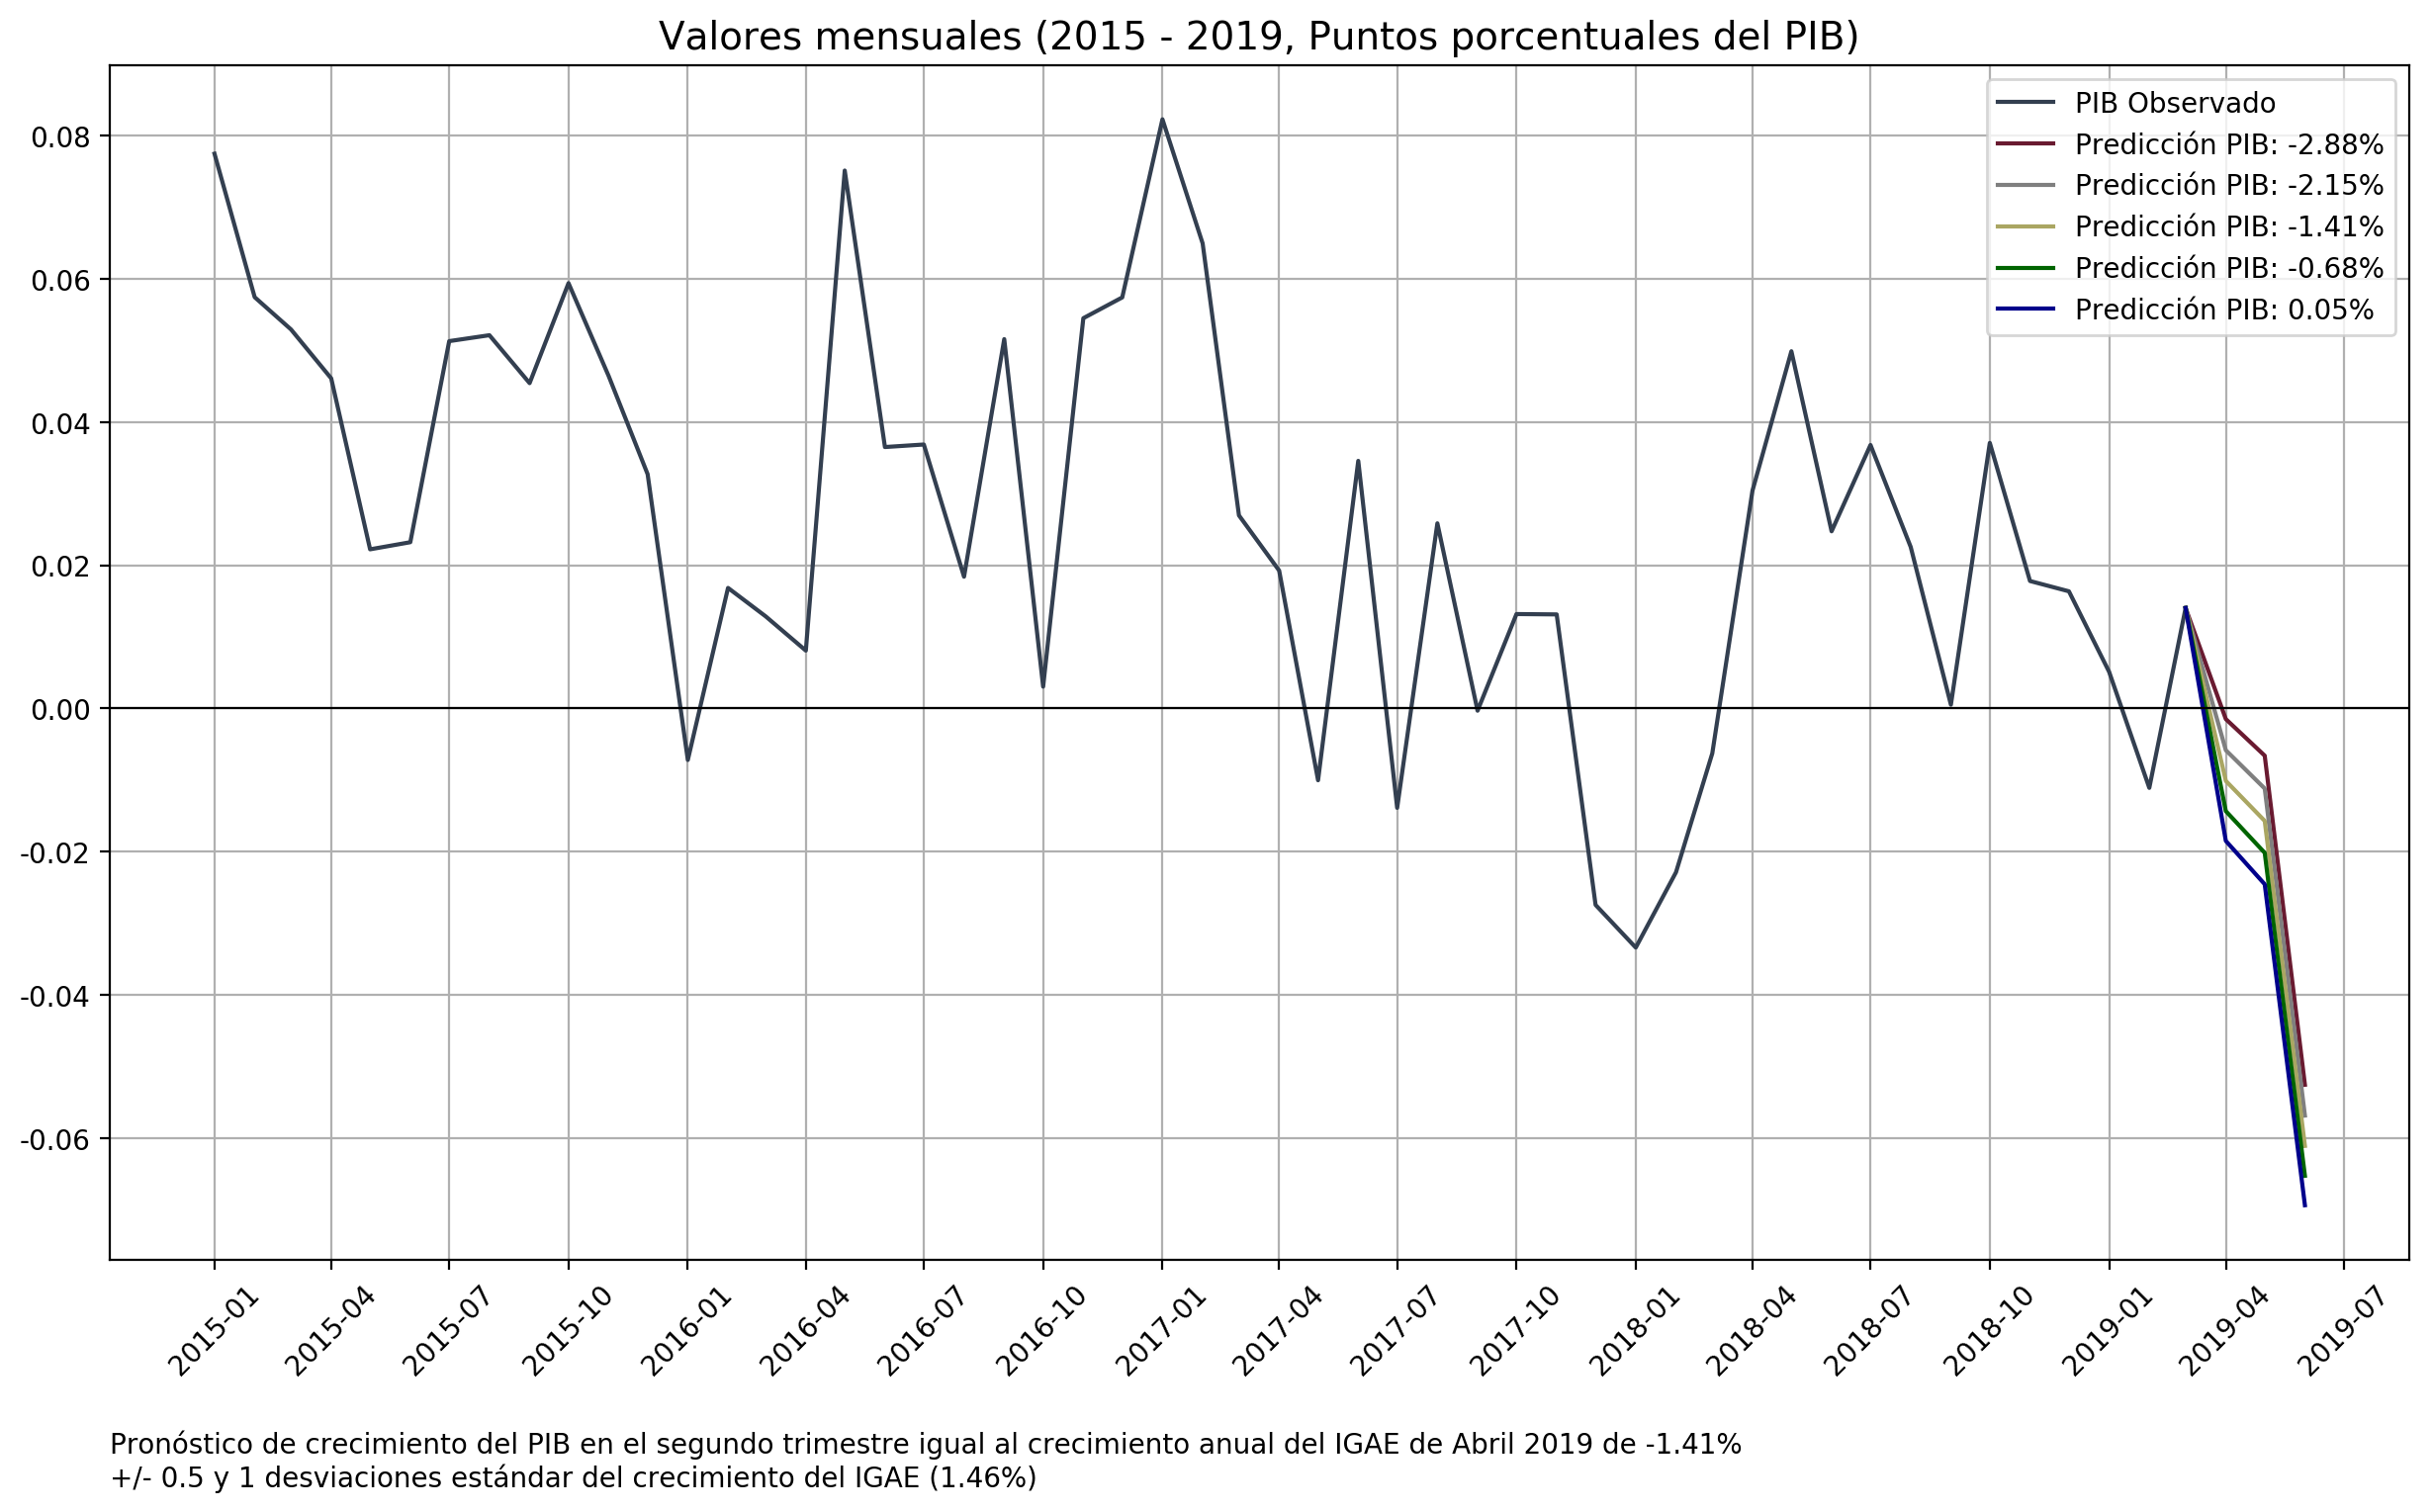

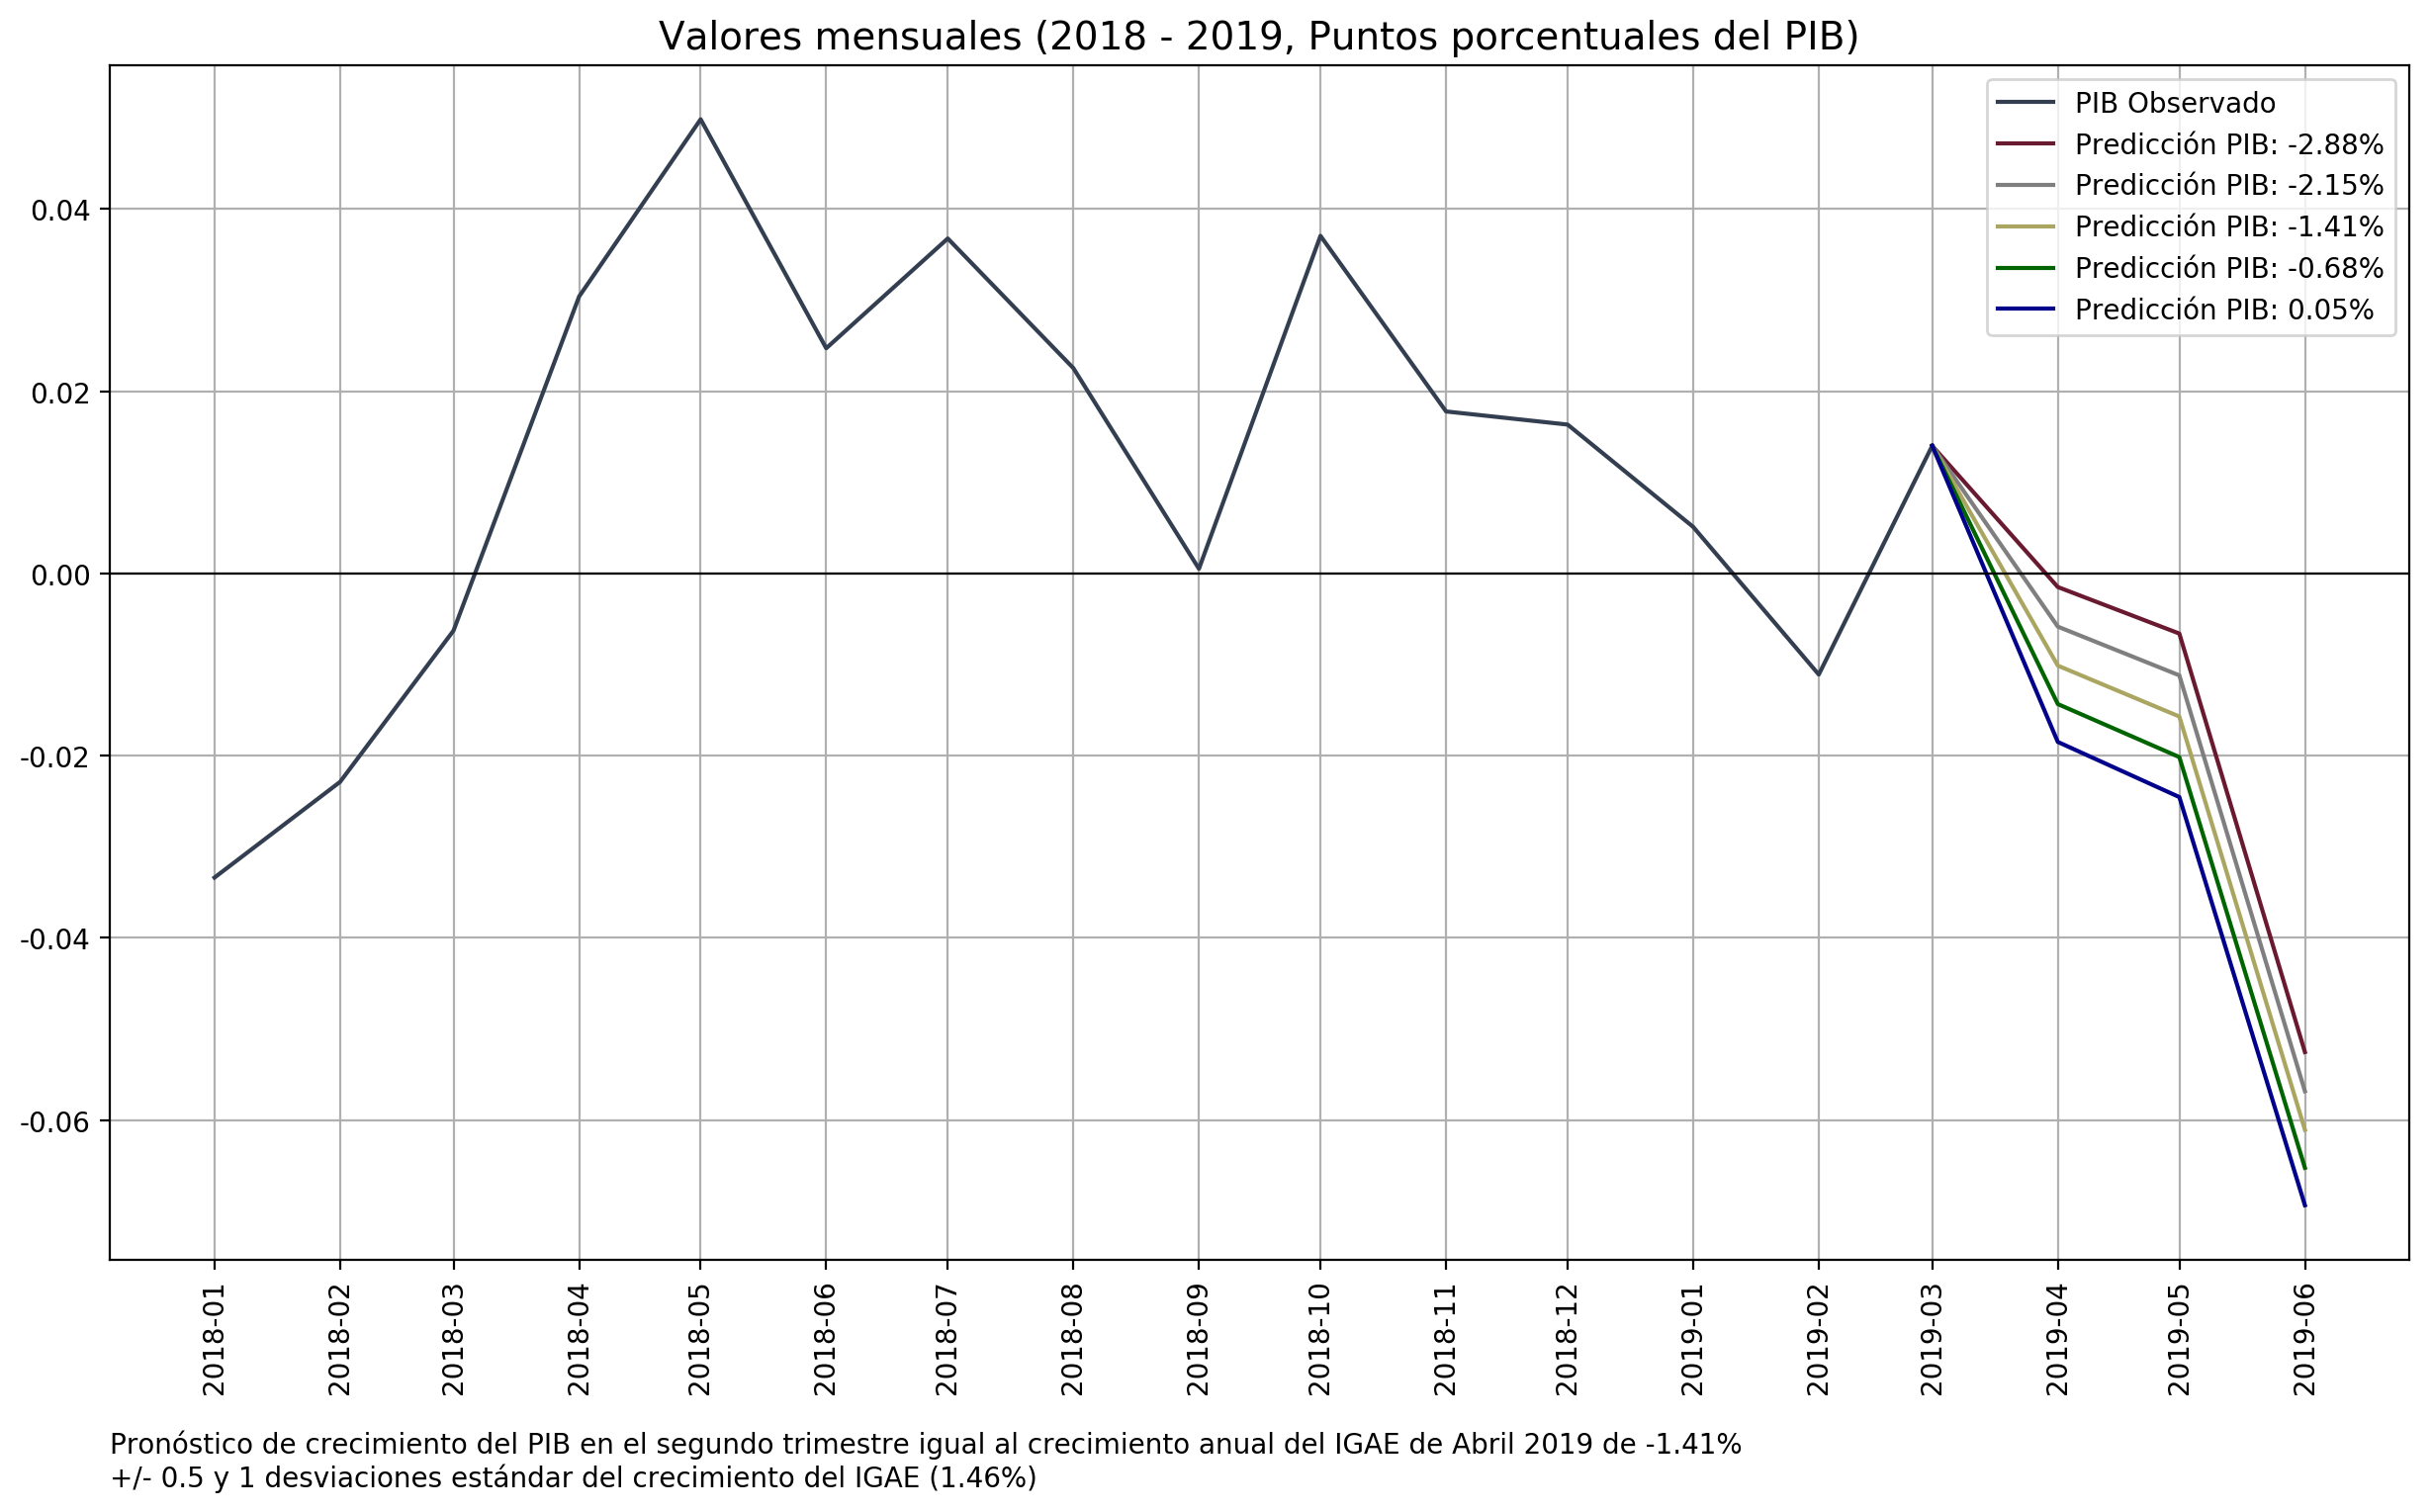

In [54]:
# Hacemos graficas para IVA
# descriptive.plot_series(cambio_eficiencia_df_to_plot,
#                         graph_vars_dict['iva_bruto'], 
#                         legend=graph_change_labels,
#                         title='Cambio anual en eficiencia recaudatoria del IVA Bruto',
#                         subtitle='Valores mensuales (2015 - 2019, Puntos porcentuales del PIB)', ticks='quarterly',
#                         hline=0,
#                         dpi=200,
#                         save_to='../figures/cambio_eficiencia_iva_bruto_mens_2014-01-01.png',
#                         footnote=footnote)
descriptive.plot_series(cambio_eficiencia_df_to_plot,
                        graph_vars_dict['iva_bruto'], 
                        legend=graph_change_labels,
                        title='Valores mensuales (2015 - 2019, Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
                        dpi=200,
                        save_to='../figures/cambio_eficiencia_iva_bruto_mens_2014-01-01_notit.png',
                        footnote=footnote)

# descriptive.plot_series(cambio_eficiencia_df_to_plot,
#                         graph_vars_dict['iva_bruto'], 
#                         legend=graph_change_labels,
#                         title='Cambio anual en eficiencia recaudatoria del IVA Bruto',
#                         subtitle='Valores mensuales (2018 - 2019, Puntos porcentuales del PIB)', ticks='monthly',
#                         hline=0,
#                         min_date='2018-01-01',
#                         dpi=200,
#                         save_to='../figures/cambio_eficiencia_iva_bruto_mens_2018-01-01.png',
#                         footnote=footnote)
descriptive.plot_series(cambio_eficiencia_df_to_plot,
                        graph_vars_dict['iva_bruto'], 
                        legend=graph_change_labels,
                        title='Valores mensuales (2018 - 2019, Puntos porcentuales del PIB)', ticks='monthly',
                        hline=0,
                        min_date='2018-01-01',
                        dpi=200,
                        save_to='../figures/cambio_eficiencia_iva_bruto_mens_2018-01-01_notit.png',
                        footnote=footnote)

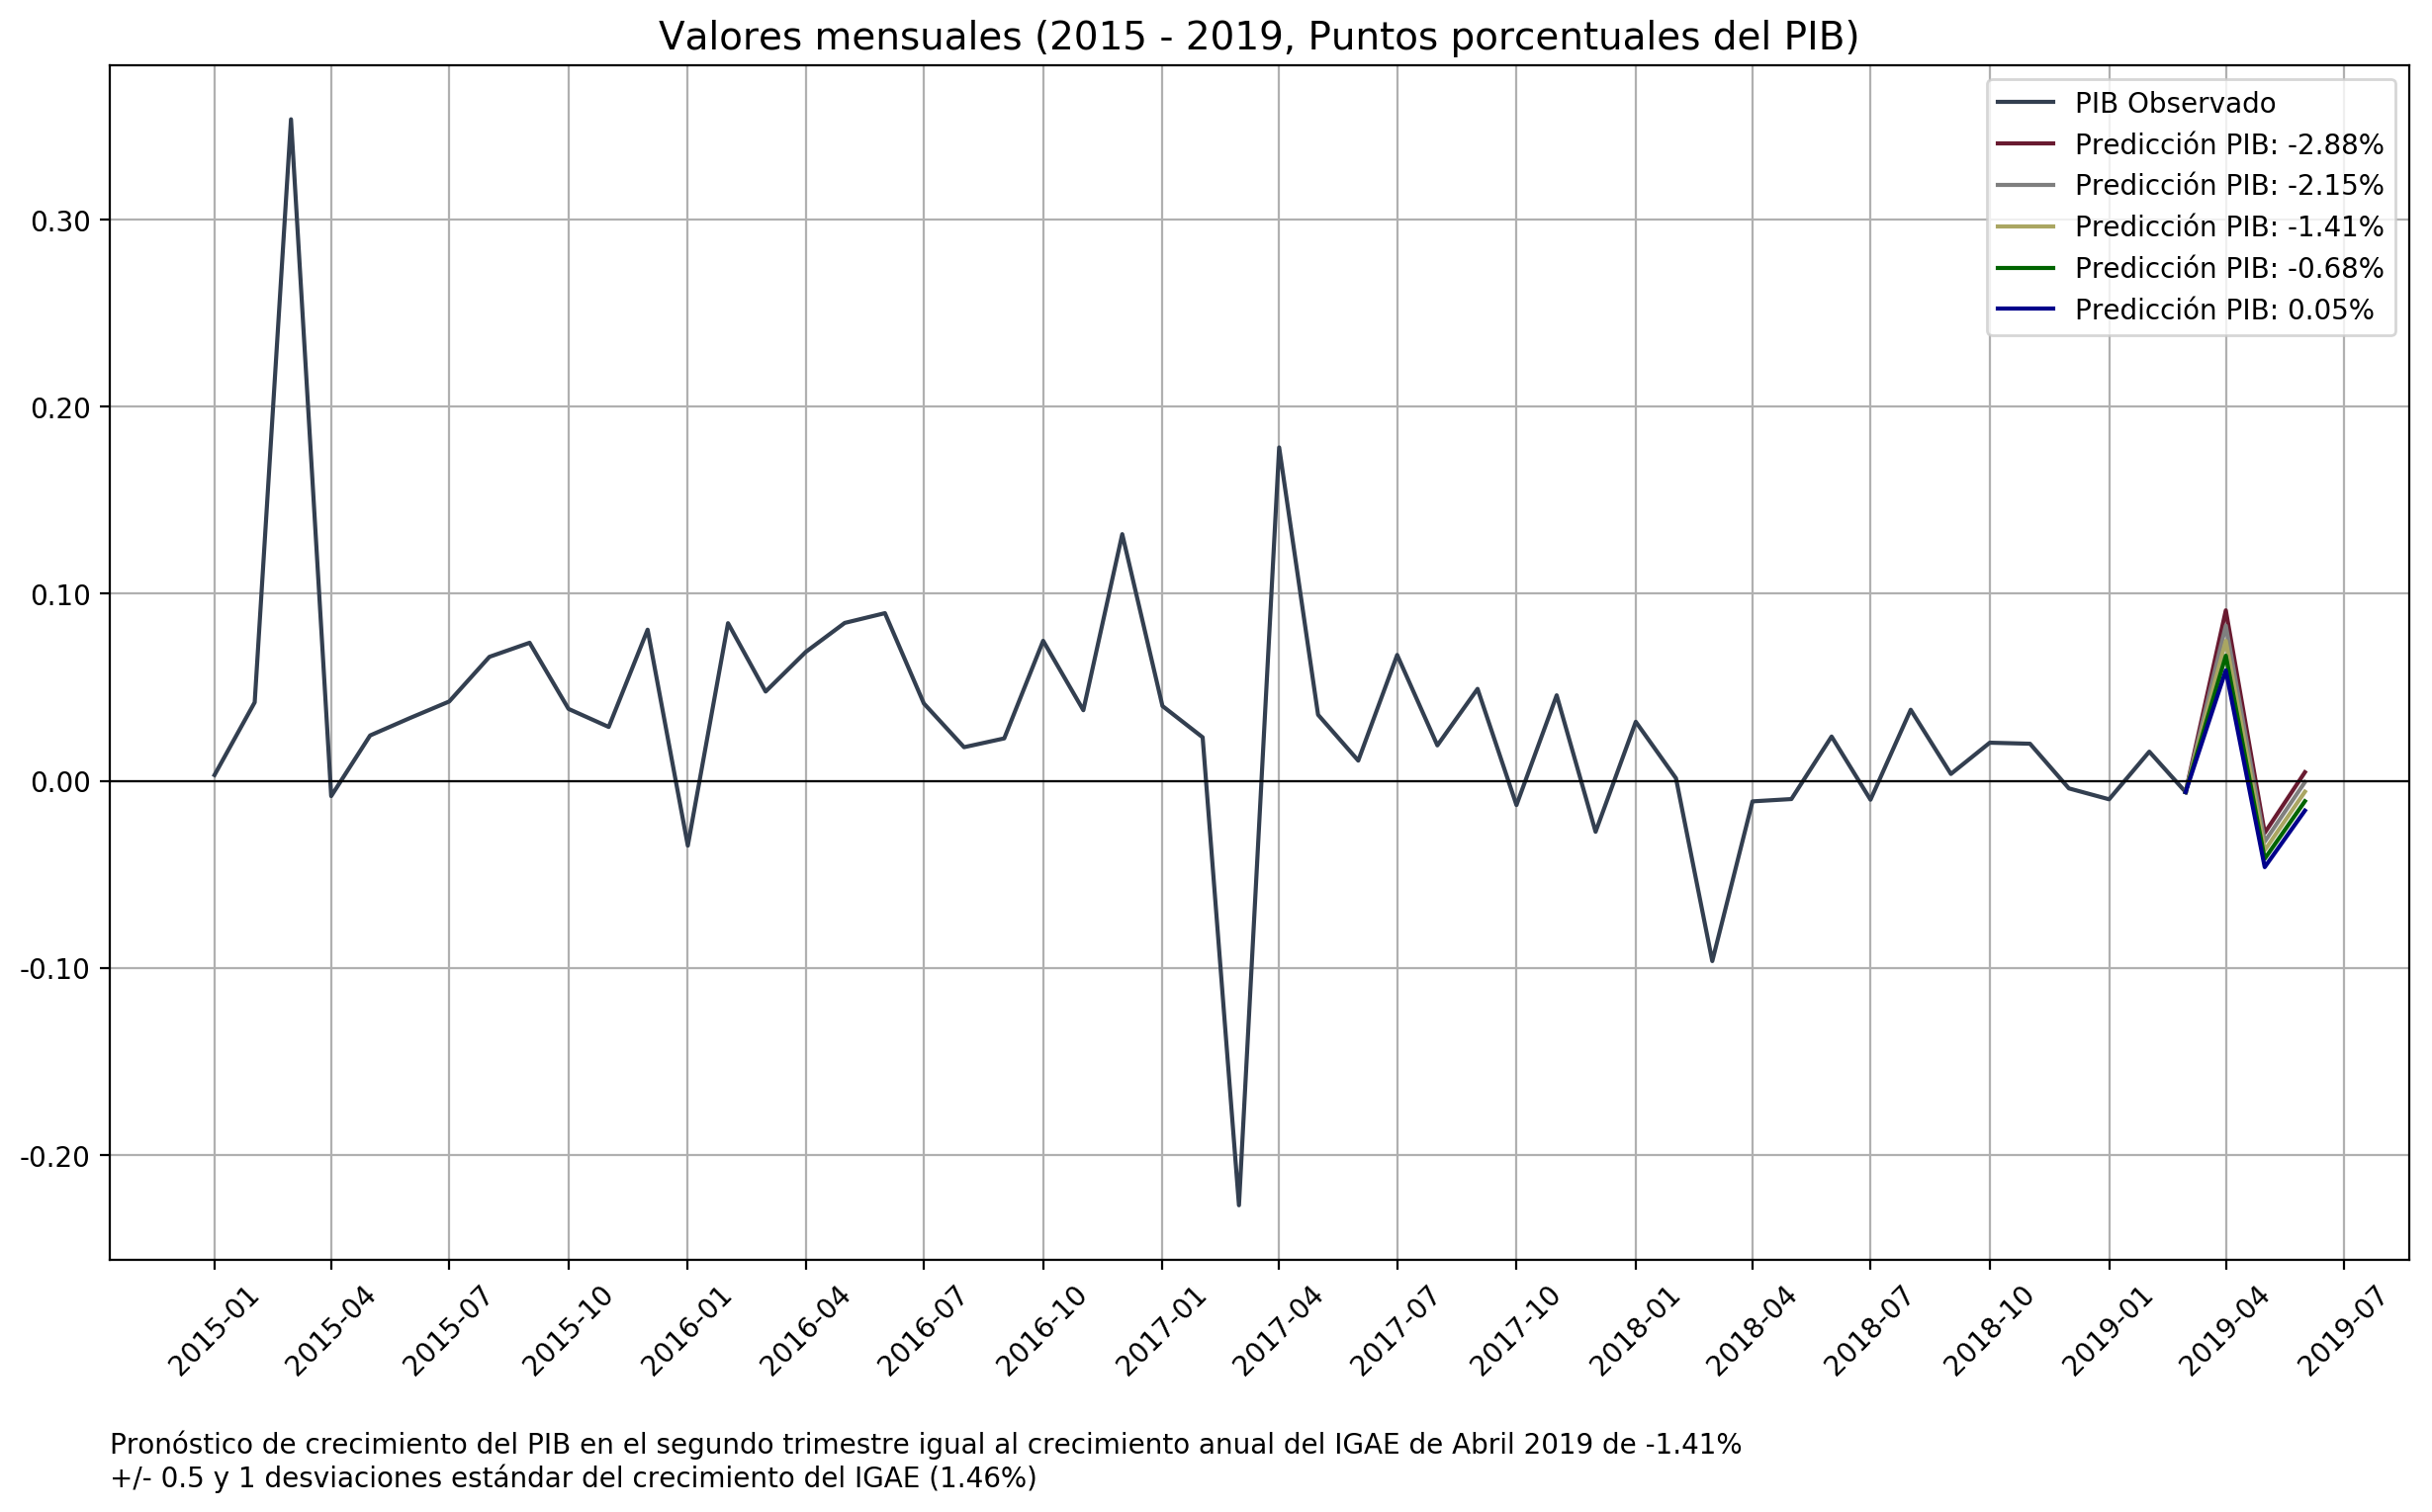

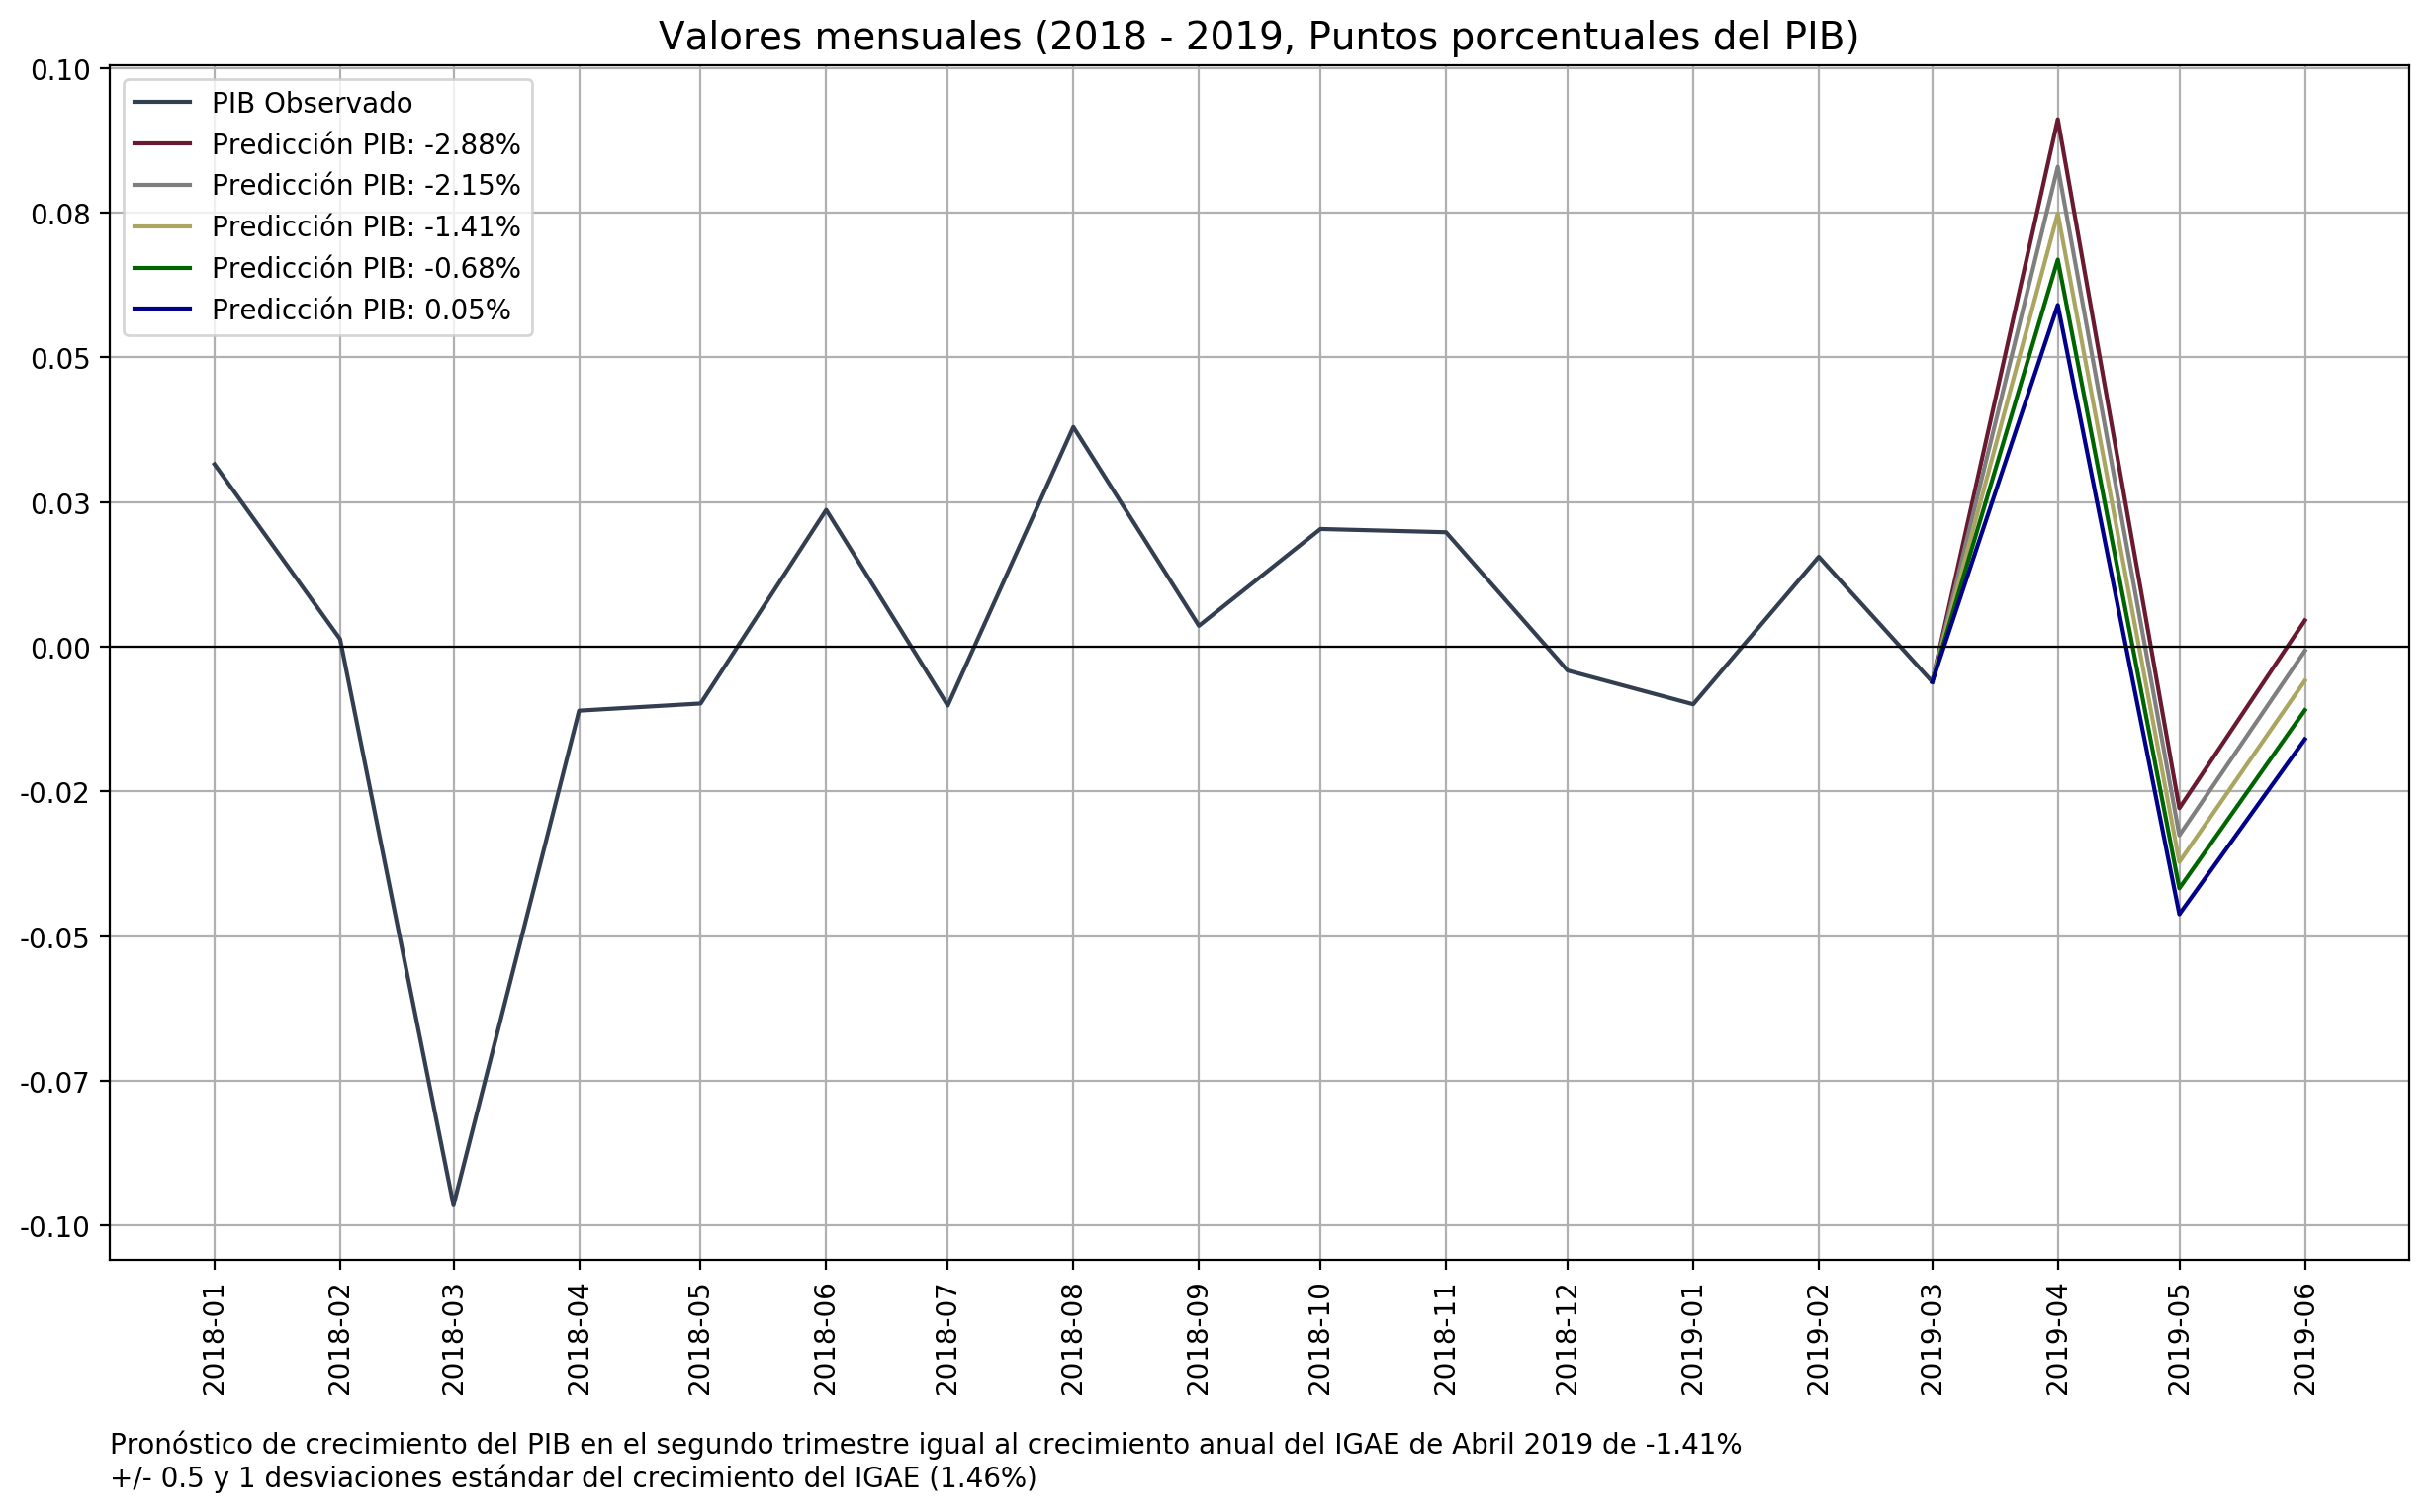

In [55]:
# HAcemos graficas para ISR
# descriptive.plot_series(cambio_eficiencia_df_to_plot,
#                         graph_vars_dict['isr_bruto'], 
#                         legend=graph_change_labels,
#                         title='Cambio anual en eficiencia recaudatoria del ISR Bruto',
#                         subtitle='Valores mensuales (2015 - 2019, Puntos porcentuales del PIB)', ticks='quarterly',
#                         hline=0,
#                         dpi=200,
#                         save_to='../figures/cambio_eficiencia_isr_bruto_mens_2014-01-01.png',
#                         footnote=footnote)
descriptive.plot_series(cambio_eficiencia_df_to_plot,
                        graph_vars_dict['isr_bruto'], 
                        legend=graph_change_labels,
                        title='Valores mensuales (2015 - 2019, Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
                        dpi=200,
                        save_to='../figures/cambio_eficiencia_isr_bruto_mens_2014-01-01_notit.png',
                        footnote=footnote)

# descriptive.plot_series(cambio_eficiencia_df_to_plot,
#                         graph_vars_dict['isr_bruto'], 
#                         legend=graph_change_labels,
#                         title='Cambio anual en eficiencia recaudatoria del ISR Bruto',
#                         subtitle='Valores mensuales (2018 - 2019, Puntos porcentuales del PIB)', ticks='monthly',
#                         hline=0,
#                         min_date='2018-01-01',
#                         dpi=200,
#                         save_to='../figures/cambio_eficiencia_isr_bruto_mens_2018-01-01.png',
#                         footnote=footnote)
descriptive.plot_series(cambio_eficiencia_df_to_plot,
                        graph_vars_dict['isr_bruto'], 
                        legend=graph_change_labels,
                        title='Valores mensuales (2018 - 2019, Puntos porcentuales del PIB)', ticks='monthly',
                        hline=0,
                        min_date='2018-01-01',
                        dpi=200,
                        save_to='../figures/cambio_eficiencia_isr_bruto_mens_2018-01-01_notit.png',
                        footnote=footnote)

### Elasticidad ultimo periodo

In [56]:
growth_rates

[-2.8775127068554824,
 -2.1460810211171655,
 -1.414649335378848,
 -0.6832176496405309,
 0.04821403609778629]

In [57]:
crecimiento_rec = ingresos_brutos.pct_change(12)
crecimiento_rec = crecimiento_rec.add_prefix('Crec_perc_')

In [58]:
## TABLA IVA

tabla_elast_iva = crecimiento_rec.loc[pd.date_range('2019-04-01', '2019-06-01', freq='MS'),\
                    ['Crec_perc_iva_bruto_(mdp)_r']] * 100
for growth in growth_rates:
    tabla_elast_iva['Elasticidad (Crecimiento PIB : {:.2f}%)'.format(growth)] =\
        tabla_elast_iva['Crec_perc_iva_bruto_(mdp)_r'] / growth
tabla_elast_iva.rename(columns = {'Crec_perc_iva_bruto_(mdp)_r': 'Crecimiento % del IVA'},
                       inplace=True)
display(tabla_elast_iva.applymap(lambda x: '{:.2f}'.format(x)))

## TABLA ISR
tabla_elast_isr = crecimiento_rec.loc[pd.date_range('2019-04-01', '2019-06-01', freq='MS'),\
                    ['Crec_perc_isr_bruto_(mdp)_r']] * 100
for growth in growth_rates:
    tabla_elast_isr['Elasticidad (Crecimiento PIB : {:.2f}%)'.format(growth)] =\
        tabla_elast_isr['Crec_perc_isr_bruto_(mdp)_r'] / growth
tabla_elast_isr.rename(columns = {'Crec_perc_isr_bruto_(mdp)_r': 'Crecimiento % del ISR'},
                       inplace=True)
display(tabla_elast_isr.applymap(lambda x: '{:.2f}'.format(x)))

Crecimiento % del IVA Elasticidad (Crecimiento PIB : -2.88%)  \
2019-04-01                 -3.12                                   1.09   
2019-05-01                 -3.91                                   1.36   
2019-06-01                -11.01                                   3.82   

           Elasticidad (Crecimiento PIB : -2.15%)  \
2019-04-01                                   1.46   
2019-05-01                                   1.82   
2019-06-01                                   5.13   

           Elasticidad (Crecimiento PIB : -1.41%)  \
2019-04-01                                   2.21   
2019-05-01                                   2.76   
2019-06-01                                   7.78   

           Elasticidad (Crecimiento PIB : -0.68%)  \
2019-04-01                                   4.57   
2019-05-01                                   5.72   
2019-06-01                                  16.11   

           Elasticidad (Crecimiento PIB : 0.05%)  
2019-04-01                                -64.81  
2019-05-01                                -81.09  
2019-06-01                               -228.27

Crecimiento % del ISR Elasticidad (Crecimiento PIB : -2.88%)  \
2019-04-01                  5.92                                  -2.06   
2019-05-01                 -7.01                                   2.44   
2019-06-01                 -2.24                                   0.78   

           Elasticidad (Crecimiento PIB : -2.15%)  \
2019-04-01                                  -2.76   
2019-05-01                                   3.27   
2019-06-01                                   1.05   

           Elasticidad (Crecimiento PIB : -1.41%)  \
2019-04-01                                  -4.18   
2019-05-01                                   4.96   
2019-06-01                                   1.59   

           Elasticidad (Crecimiento PIB : -0.68%)  \
2019-04-01                                  -8.66   
2019-05-01                                  10.27   
2019-06-01                                   3.28   

           Elasticidad (Crecimiento PIB : 0.05%)  
2019-04-01                                122.76  
2019-05-01                               -145.49  
2019-06-01                                -46.53

In [59]:
for growth in growth_rates:
    tabla_elast['elast_crec_pib_{:.2f}%'.format(growth)] = tabla_elast['Crec_perc_iva_bruto_(mdp)_r'] / growth

NameError: name 'tabla_elast' is not defined

In [239]:
tabla_elast

Crec_perc_iva_bruto_(mdp)_r  elast_crec_pib_-2.88%  \
2019-04-01                    -3.124718               1.085910   
2019-05-01                    -3.909445               1.358620   
2019-06-01                   -11.006031               3.824842   

            elast_crec_pib_-2.15%  elast_crec_pib_-1.41%  \
2019-04-01               1.456011               2.208829   
2019-05-01               1.821667               2.763544   
2019-06-01               5.128432               7.780042   

            elast_crec_pib_-0.68%  elast_crec_pib_0.05%  
2019-04-01               4.573533            -64.809311  
2019-05-01               5.722108            -81.085209  
2019-06-01              16.109114           -228.274417

# Análisis trimestral

In [161]:
# Regresamos el PIB a valores trimestrales
pib_r_df_predict_q = pib_r_df_predict.resample('3MS').mean()

In [162]:
# Veamos la lista de predicciones de PIB
prediction_names_l

['pibr_2019',
 'pib_r_2019_-1.41%',
 'pib_r_2019_-2.88%',
 'pib_r_2019_-2.15%',
 'pib_r_2019_-0.68%',
 'pib_r_2019_0.05%']

## Escenario optimista - Ingresos Junio = Promedio Abril Mayo

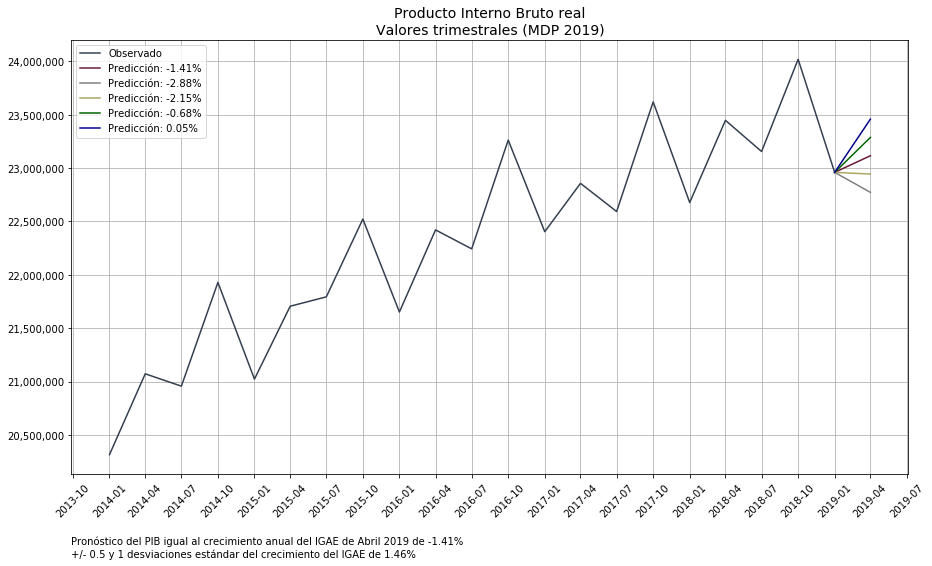

In [177]:
# Hacemos un DF específico para graficar también el PIB
pib_r_df_predict_q_to_plot = pib_r_df_predict_q.copy()
# Hacemos una lista con las variables que vamos a reemplazar por NaN antes del periodo de precicción
pib_predictions = [col for col in prediction_names_l if col != 'pibr_2019']
# Reemplazamos por NaN
pib_r_df_predict_q_to_plot.loc[pd.date_range('2014-01-01', '2018-10-01', freq='QS'), pib_predictions] = np.nan

# Creamos lista de labels
pib_labels = ['Observado']
pib_labels += [col.replace('pib_r_2019_', 'Predicción: ') for col in prediction_names_l if\
              col.startswith('pib_r_2019_')]

descriptive.plot_series(df=pib_r_df_predict_q_to_plot,
                        cols=prediction_names_l,
                        legend=pib_labels,
                        title='Producto Interno Bruto real', subtitle='Valores trimestrales (MDP 2019)',
                        ticks='quarterly', 
                        save_to='../figures/pib_real.png',
                        footnote=footnote)

In [178]:
footnote = '''Pronóstico de ingresos tributarios de Junio 2019 igual al promedio de ingresos tributarios
de Abril y Mayo 2019'''

In [180]:
# Para convertir la recaudación a valores trimestrales tenemos que asignar un valor a Junio. Una opeción es el
# promedio de Abril y Mayo, pero viendo la serie eso parece muy optimista porque Abril es excepcionalmente alto.
# Utilizaremos ese método por ahora, pero habrá que pensar mejor. 

# Copiamos los ingresos a una nueva DF
ingresos_brutos_to_trim = ingresos_brutos.copy()
# Creamos ingresos tributarios trimestrales como la suma de los meses que componen cada trimestre
ingresos_brutos_q = ingresos_brutos_to_trim.resample('QS').sum()
ingresos_brutos_q.replace({0: np.nan}, inplace=True)

In [181]:
ingresos_brutos_q

ing_tot_brut_(mdp)  ing_neto_(mdp)  ing_trib_brut_(mdp)  \
fecha                                                                 
2014-01-01            894232.0        731671.0             645352.0   
2014-04-01            890117.0        699072.0             628547.0   
2014-07-01            849620.0        681738.0             588643.0   
2014-10-01            933108.0        786424.0             606758.0   
2015-01-01           1049448.0        861207.0             835739.0   
2015-04-01            899934.0        724684.0             737919.0   
2015-07-01            906489.0        738203.0             730315.0   
2015-10-01           1042797.0        862942.0             751234.0   
2016-01-01           1036242.0        849933.0             904391.0   
2016-04-01           1239572.0       1024669.0             883010.0   
2016-07-01            980065.0        789819.0             836910.0   
2016-10-01           1108118.0        913705.0             866725.0   
2017-01-01           1482392.0       1238599.0             974065.0   
2017-04-01           1157584.0        902414.0             988749.0   
2017-07-01           1079639.0        867331.0             918408.0   
2017-10-01           1119194.0        862034.0             926222.0   
2018-01-01           1200918.0        981137.0            1001055.0   
2018-04-01           1258006.0        957024.0            1066058.0   
2018-07-01           1242529.0        987032.0             993686.0   
2018-10-01           1193398.0        918651.0            1033116.0   
2019-01-01            861052.0        619528.0             733339.0   
2019-04-01            397296.0             NaN             341947.0   

            ing_trib_neto_(mdp)  ing_no_trib_bruto_(mdp)  \
fecha                                                      
2014-01-01             483611.0            248880.327390   
2014-04-01             440013.0            261569.584469   
2014-07-01             422420.0            260977.035454   
2014-10-01             461905.0            326350.033628   
2015-01-01             664347.0            213709.148848   
2015-04-01             564240.0            162015.103921   
2015-07-01             564421.0            176175.137436   
2015-10-01             573489.0            291564.818071   
2016-01-01             723162.0            131851.271328   
2016-04-01             669944.0            356563.043188   
2016-07-01             648592.0            143154.872100   
2016-10-01             674519.0            241393.510101   
2017-01-01             732531.0            508326.929649   
2017-04-01             736380.0            168834.880169   
2017-07-01             708265.0            161231.073522   
2017-10-01             672352.0            192971.703710   
2018-01-01             784412.0            199861.820197   
2018-04-01             773664.0            191947.799931   
2018-07-01             741208.0            248843.857748   
2018-10-01             761408.0            160281.792804   
2019-01-01             577751.0            127712.854172   
2019-04-01                  NaN                      NaN   

            ing_no_trib_neto_(mdp)  iva_bruto_(mdp)  iva_neto_(mdp)  \
fecha                                                                 
2014-01-01           248060.474544    247763.736860   169246.638403   
2014-04-01           259057.785488    254116.720278   163682.799052   
2014-07-01           259319.344636    264893.574235   165166.470933   
2014-10-01           324519.862471    269164.669434   167766.431279   
2015-01-01           196860.234525    297620.755025   172694.689950   
2015-04-01           160444.357614    286206.103322   172178.896741   
2015-07-01           173782.236165    310134.210966   192042.112110   
2015-10-01           289453.271996    309475.933295   166262.312648   
2016-01-01           126769.772751    319000.288354   187773.834385   
2016-04-01           354724.718528    326390.000000   186489.001454   
2016-07-01    

In [182]:
# # Para convertir la recaudación a valores trimestrales tenemos que asignar un valor a Junio. Una opeción es el
# # promedio de Abril y Mayo, pero viendo la serie eso parece muy optimista porque Abril es excepcionalmente alto.
# # Utilizaremos ese método por ahora, pero habrá que pensar mejor. 

# # Copiamos los ingresos a una nueva DF
# ingresos_sat_to_trim = ingresos_sat.copy()
# # Obtenemos los valores promedio de Abril y Mayo
# mean_vals = ingresos_sat_to_trim.loc[pd.date_range('2019-04-01', '2019-05-01', freq='MS')].mean()
# # Hacemos un append de estos valores promedio al final del DF
# ingresos_sat_to_trim = ingresos_sat_to_trim.append(mean_vals, ignore_index=True)
# # El paso anterior modificó el indice y lo volvió un contador. Lo volvemos a poner como fecha, incluyendo junio.
# ingresos_sat_to_trim.index = (pd.date_range('2014-01-01', '2019-06-01', freq='MS'))
# # Creamos ingresos tributarios trimestrales como la suma de los meses que componen cada trimestre
# ingresos_sat_q = ingresos_sat_to_trim.resample('3MS').sum()
# ingresos_sat_q.replace({0: np.nan}, inplace=True)

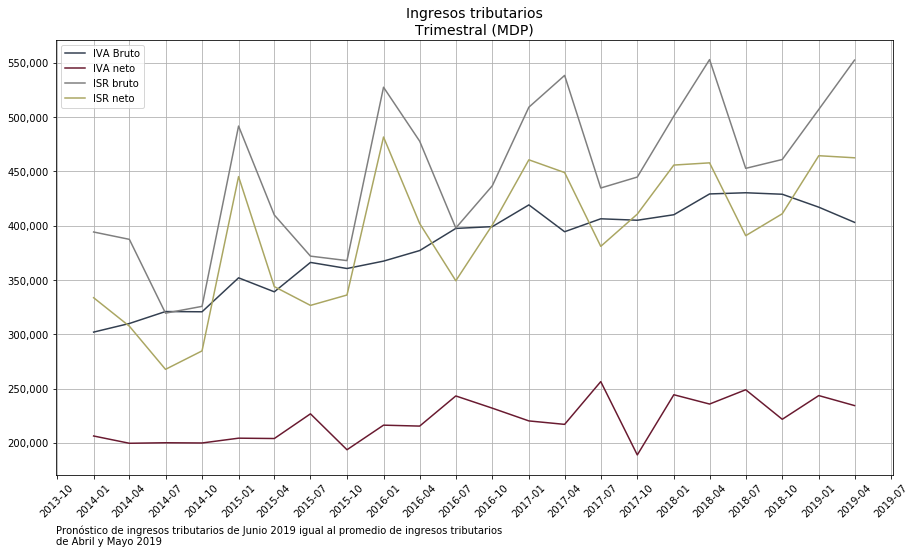

In [184]:
descriptive.plot_series(df=ingresos_brutos_q,
                        cols=['iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r','isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r'],
                        legend= ['IVA Bruto', 'IVA neto','ISR bruto', 'ISR neto'],
                        title='Ingresos tributarios', subtitle='Trimestral (MDP)',ticks='quarterly',
                        footnote=footnote)

## Volvemos a calcular valores porcentuales

In [186]:
# Para calcular la eficiencia tributaria, tenemos que hacer un loop sobre cada uno de los impuestos y sobre cada
# una de las predicciones. Para ello, creamos una lista de los impuestos que usaremos, y usaremos la lista que 
# creamos que tiene los nombres de las predicciones. También crearemos un nuevo DataFrame con los valores de
# eficiencia.
eficiencia_df_q = pd.DataFrame(index=ingresos_brutos_q.index)
impuestos_a_usar = ['iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r', 'isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r']
# Ampliamos la lista de prediction_names_l para que incluya el pib original. Esto serirá para graficar
prediction_names_l.append('pibr_2019')
for tax in impuestos_a_usar:
    for prediction_name in prediction_names_l:
        # Obtenemos el impuesto que usaremos como denominador
        impuesto = ingresos_brutos_q[tax]
        # Obtenemos la predicción que usaremos como denominador
        prediction_pib = pib_r_df_predict_q[prediction_name]
        # Creamos el nombre de la variable que crearemos. Será por ejemplo: 'iva_bruto_%PIB_-1.4%'
        # Para eso, eliminamos la ultima parte del nombre del impuesto, eliminamos la primera parte del
        # nombre de la predicción, y los juntamos con %PIB en medio
        nombre_variable_ef = tax.replace('(mdp)_r', '') + '%PIB_' + prediction_name.replace('pib_r_2019_', '')
        eficiencia_df_q[nombre_variable_ef] = (impuesto / prediction_pib) * 100

# Gráfica 1

In [187]:
footnote_q = '''
Pronóstico del PIB igual al crecimiento anual del IGAE de Abril 2019 de {0:.2f}%
+/- 0.5 y 1 desviaciones estándar del crecimiento del IGAE de {1:.2f}%'''\
.format(last_growth_igae * 100, igae_growth_std * 100)

In [188]:
# footnote_q = '''
# Pronóstico del PIB igual al crecimiento anual del IGAE de Abril 2019 de {0:.2f}%
# +/- 0.5 y 1 desviaciones estándar del crecimiento del IGAE de {1:.2f}%

# Pronóstico de ingresos tributarios de Junio 2019 igual al promedio de ingresos tributarios
# de Abril y Mayo 2019'''\
# .format(last_growth_igae * 100, igae_growth_std * 100)

In [189]:
# De nuevo hacemos un DF específico para el plot
eficiencia_df_q_to_plot = eficiencia_df_q.copy()
# Reemplazamos por NA las variables en prediction_vars para el periodo observado
eficiencia_df_q_to_plot.loc[pd.date_range('2014-01-01', '2018-10-01', freq='QS'), prediction_vars] = np.nan

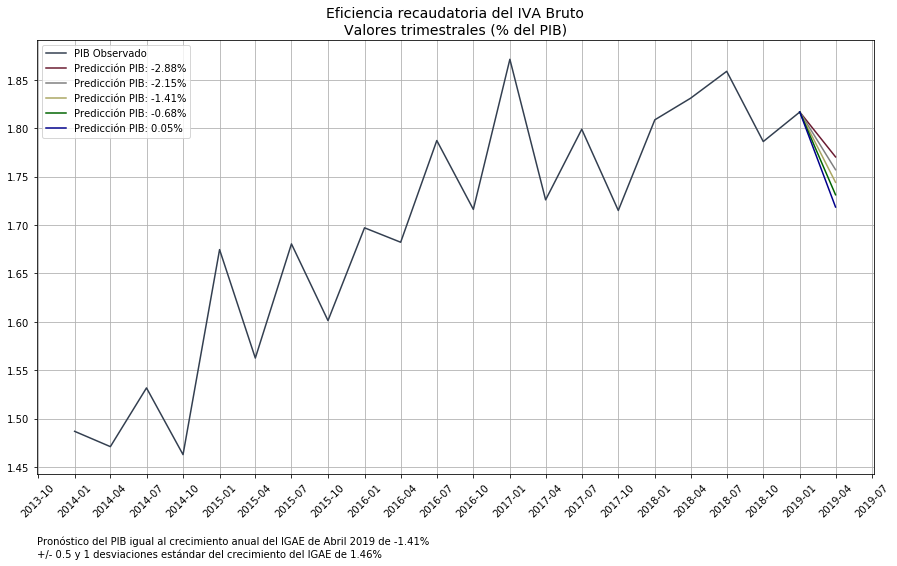

In [190]:
# Hacemos graficas para IVA
descriptive.plot_series(df=eficiencia_df_q_to_plot,
                        cols=graph_vars_dict['iva_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores trimestrales (% del PIB)', ticks='quarterly',
                        save_to='../figures/eficiencia_iva_bruto_trim_2014-01-01.png',
                        footnote=footnote_q)

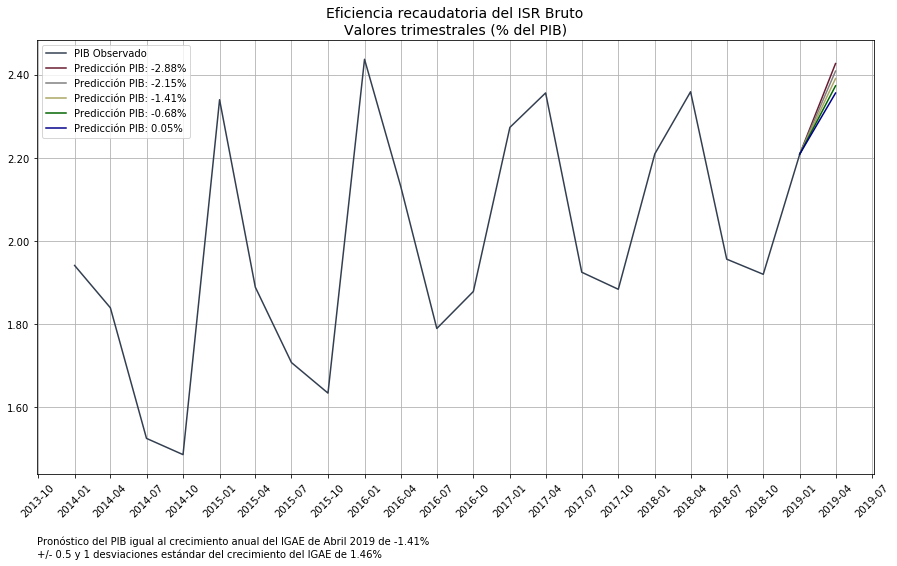

In [191]:
# HAcemos graficas para ISR
descriptive.plot_series(df=eficiencia_df_q_to_plot,
                        cols=graph_vars_dict['isr_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores trimestrales (% del PIB)', ticks='quarterly',
                        save_to='../figures/eficiencia_isr_bruto_trim_2014-01-01.png',
                        footnote=footnote_q)

# Grafica 2
### Cambio en eficiencia recaudatoria IVA e ISR brutos

In [192]:
# Calculamos diferencias en eficiencia
cambio_eficiencia_df_q = eficiencia_df_q.diff(4)

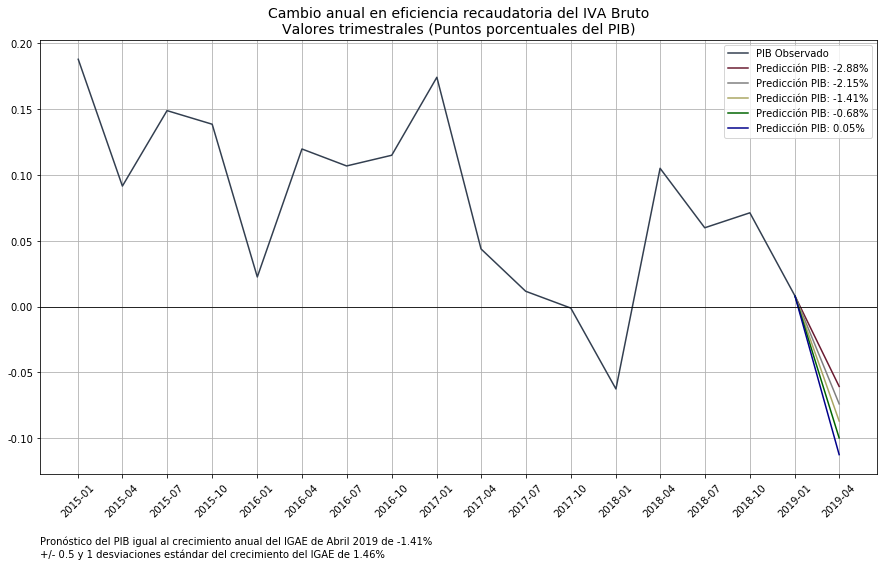

In [193]:
# HAcemos graficas para IVA
cambio_eficiencia_df_q_to_plot = cambio_eficiencia_df_q.copy()
cambio_eficiencia_df_q_to_plot.loc[pd.date_range('2014-01-01', '2018-10-01', freq='QS'), prediction_vars] = np.nan

descriptive.plot_series(cambio_eficiencia_df_q_to_plot,
                        graph_vars_dict['iva_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores trimestrales (Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
                        save_to='../figures/cambio_eficiencia_iva_bruto_trim_2014-01-01.png',
                        footnote=footnote_q)

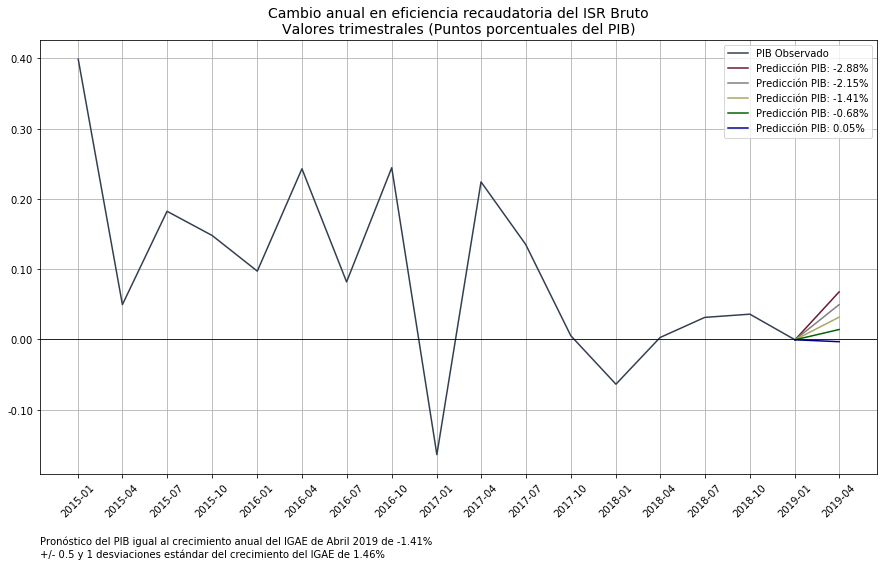

In [194]:
# Hacemos graficas para ISR
descriptive.plot_series(cambio_eficiencia_df_q_to_plot,
                        graph_vars_dict['isr_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores trimestrales (Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
                        save_to='../figures/cambio_eficiencia_isr_bruto_trim_2014-01-01.png',
                        footnote=footnote_q)

In [3]:
# Hacemos graficas para ISR
descriptive.plot_series(cambio_eficiencia_df_q_to_plot,
                        graph_vars_dict['isr_iva_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del ISR e IVA Brutos',
                        subtitle='Valores trimestrales (Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
                        footnote=footnote_q)

NameError: name 'descriptive' is not defined

## Escenario conservador - Ingresos Junio = Ingresos Mayo

In [ ]:
footnote = '''Pronóstico de ingresos tributarios de Junio 2019 igual a ingresos tributarios de Mayo 2019'''

In [ ]:
# Para convertir la recaudación a valores trimestrales tenemos que asignar un valor a Junio. Una opeción es el
# promedio de Abril y Mayo, pero viendo la serie eso parece muy optimista porque Abril es excepcionalmente alto.
# Utilizaremos ese método por ahora, pero habrá que pensar mejor. 

# Copiamos los ingresos a una nueva DF
ingresos_sat_to_trim = ingresos_sat.copy()
# Obtenemos los valores promedio de Abril y Mayo
may_vals = ingresos_sat_to_trim.loc['2019-05-01']
# Hacemos un append de estos valores promedio al final del DF
ingresos_sat_to_trim = ingresos_sat_to_trim.append(may_vals, ignore_index=True)
# El paso anterior modificó el indice y lo volvió un contador. Lo volvemos a poner como fecha, incluyendo junio.
ingresos_sat_to_trim.index = (pd.date_range('2014-01-01', '2019-06-01', freq='MS'))
# Creamos ingresos tributarios trimestrales como la suma de los meses que componen cada trimestre
ingresos_sat_q = ingresos_sat_to_trim.resample('3MS').sum()
ingresos_sat_q.replace({0: np.nan}, inplace=True)

In [ ]:
descriptive.plot_series(df=ingresos_sat_q,
                        cols=['iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r','isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r'],
                        legend= ['IVA Bruto', 'IVA neto','ISR bruto', 'ISR neto'],
                        title='Ingresos tributarios', subtitle='Trimestral (MDP)',ticks='quarterly',
                        footnote=footnote)

## Volvemos a calcular valores porcentuales

In [ ]:
# Para calcular la eficiencia tributaria, tenemos que hacer un loop sobre cada uno de los impuestos y sobre cada
# una de las predicciones. Para ello, creamos una lista de los impuestos que usaremos, y usaremos la lista que 
# creamos que tiene los nombres de las predicciones. También crearemos un nuevo DataFrame con los valores de
# eficiencia.
eficiencia_df_q = pd.DataFrame(index=ingresos_sat_q.index)
impuestos_a_usar = ['iva_bruto_(mdp)_r', 'iva_neto_(mdp)_r', 'isr_bruto_(mdp)_r', 'isr_neto_(mdp)_r']
# Ampliamos la lista de prediction_names_l para que incluya el pib original. Esto serirá para graficar
prediction_names_l.append('pibr_2019')
for tax in impuestos_a_usar:
    for prediction_name in prediction_names_l:
        # Obtenemos el impuesto que usaremos como denominador
        impuesto = ingresos_sat_q[tax]
        # Obtenemos la predicción que usaremos como denominador
        prediction_pib = pib_r_df_predict_q[prediction_name]
        # Creamos el nombre de la variable que crearemos. Será por ejemplo: 'iva_bruto_%PIB_-1.4%'
        # Para eso, eliminamos la ultima parte del nombre del impuesto, eliminamos la primera parte del
        # nombre de la predicción, y los juntamos con %PIB en medio
        nombre_variable_ef = tax.replace('(mdp)_r', '') + '%PIB_' + prediction_name.replace('pib_r_2019_', '')
        eficiencia_df_q[nombre_variable_ef] = (impuesto / prediction_pib) * 100

# Gráfica 1

In [ ]:
footnote_q = '''
Pronóstico del PIB igual al crecimiento anual del IGAE de Abril 2019 de {0:.2f}%
+/- 0.5 y 1 desviaciones estándar del crecimiento del IGAE de {1:.2f}%

Pronóstico de ingresos tributarios de Junio 2019 igual ingresos tributarios de Mayo 2019'''\
.format(last_growth_igae * 100, igae_growth_std * 100)

In [ ]:
# De nuevo hacemos un DF específico para el plot
eficiencia_df_q_to_plot = eficiencia_df_q.copy()
# Reemplazamos por NA las variables en prediction_vars para el periodo observado
eficiencia_df_q_to_plot.loc[pd.date_range('2014-01-01', '2018-10-01', freq='QS'), prediction_vars] = np.nan

In [ ]:
# Hacemos graficas para IVA
descriptive.plot_series(df=eficiencia_df_q_to_plot,
                        cols=graph_vars_dict['iva_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores trimestrales (% del PIB)', ticks='quarterly',
#                         save_to='../figures/eficiencia_iva_bruto_trim_2014-01-01.png',
                        footnote=footnote_q)

In [ ]:
# HAcemos graficas para ISR
descriptive.plot_series(df=eficiencia_df_q_to_plot,
                        cols=graph_vars_dict['isr_bruto'], 
                        legend=graph_labels,
                        title='Eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores trimestrales (% del PIB)', ticks='quarterly',
#                         save_to='../figures/eficiencia_isr_bruto_trim_2014-01-01.png',
                        footnote=footnote_q)

# Grafica 2
### Cambio en eficiencia recaudatoria IVA e ISR brutos

In [ ]:
# Calculamos diferencias en eficiencia
cambio_eficiencia_df_q = eficiencia_df_q.diff(4)

In [ ]:
# HAcemos graficas para IVA
cambio_eficiencia_df_q_to_plot = cambio_eficiencia_df_q.copy()
cambio_eficiencia_df_q_to_plot.loc[pd.date_range('2014-01-01', '2018-10-01', freq='QS'), prediction_vars] = np.nan

descriptive.plot_series(cambio_eficiencia_df_q_to_plot,
                        graph_vars_dict['iva_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del IVA Bruto',
                        subtitle='Valores trimestrales (Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
#                         save_to='../figures/cambio_eficiencia_iva_bruto_trim_2014-01-01.png',
                        footnote=footnote_q)

In [ ]:
# Hacemos graficas para ISR
descriptive.plot_series(cambio_eficiencia_df_q_to_plot,
                        graph_vars_dict['isr_bruto'], 
                        legend=graph_change_labels,
                        title='Cambio anual en eficiencia recaudatoria del ISR Bruto',
                        subtitle='Valores trimestrales (Puntos porcentuales del PIB)', ticks='quarterly',
                        hline=0,
#                         save_to='../figures/cambio_eficiencia_isr_bruto_trim_2014-01-01.png',
                        footnote=footnote_q)

# Análisis anual de compensaciones de IVA

In [ ]:
compensaciones_iva = ['iva_comp_(mdp)', 'iva_comp_(mdp)_r']

In [ ]:
ingresos_sat[compensaciones_iva]

In [ ]:
compensaciones_iva_anuales = ingresos_sat[compensaciones_iva].resample('YS').sum()
compensaciones_iva_anuales = compensaciones_iva_anuales.iloc[:-1]

In [ ]:
compensaciones_iva_anuales

In [ ]:
crecimiento_absoluto_comp_iva = compensaciones_iva_anuales.apply(lambda x: x - x.iloc[0])

In [ ]:
crecimiento_absoluto_comp_iva.loc[pd.date_range('2017-01-01', '2018-01-01', freq='YS')]\
    .applymap(lambda x: '{:,.0f}'.format(x))

In [ ]:
crecimiento_relativo_comp_iva = compensaciones_iva_anuales.apply(lambda x: ((x/x.iloc[0]) - 1) * 100)

In [ ]:
crecimiento_relativo_comp_iva.loc[pd.date_range('2017-01-01', '2018-01-01', freq='YS'), 'iva_comp_(mdp)_r']\
    .map(lambda x: '{:,.2f}%'.format(x))

In [ ]:
descriptive.plot_series(compensaciones_iva_anuales['iva_comp_(mdp)'],
                        title = 'Compensaciones de IVA a precios corrientes',
                        legend=False,
                        subtitle = 'Valores anuales (MDP)',
                        dpi = 200,
                        ticks= 'yearly')

In [ ]:
compensaciones_iva_reales_index = ((compensaciones_iva_anuales['iva_comp_(mdp)_r'] /
                                   compensaciones_iva_anuales['iva_comp_(mdp)_r'].iloc[0]) * 100)

In [ ]:
descriptive.plot_series(compensaciones_iva_reales_index,
                        title = 'Índice de compensaciones de IVA a precios constantes',
                        subtitle = '(2014 = 100)',
                        legend=False,
                        dpi = 200,
                        ticks= 'yearly')